# Real-life use case to practically exemplify the use of K-Means Cluster Customer Segmentation unsupervised machine learning for analysis of purchasing behavior in an online retail domain.

### The practical way is that this program for a case study tends to focus on the business side and thereby pretending to have a direct positive impact on data-driven decision making and revenue streams of an online retail business.

#### Pleanty of the code in this case study is based on the books of:

> Liu, K. (2022). Supply Chain Analytics: Concepts, Techniques and Applications. Palgrave Macmillan.

>Sarkar, D., Bali, R., & Sharma, T. (2018). Practical Machine Learning with Python: A Problem-Solver’s Guide to Building Real-World Intelligent Systems. Apress.

#### However, this case study is not the same as the previous references. For example, neither of the two previous references do imputation for missing data, so here I have included a sort of advanced data imputation based on predictive model technique of iterative imputation with sklearn.

#### This iterative imputation reveals a more data limitations and cleaning considerations and possible additional difficulties, but at the same time seds light to why the authors of the two previous references decided to drop CustomerID missing rows.

#### Thus, the case study presented here also handle with the Imputed `CustomerID` missing values, as these missing values are practically 25% (135,080 records or rows) out of total data (541,909 rows). Then we can compare these results against those of Sarkar et. al., (2018) and Liu,K.(2022).

Author of improvements: **Conrado Zarate Badillo** <br>
Date of creation: Saturday September 03 2022.<br>
Date of last modification: Wednesday September 24 2022.

## Contents of Customer Segmentation by K-Means
<a id='1'></a>

* [*1 The CRISP-DM Process Model*](#1)
* [*2 Customer Segmentation as part of Business Understanding*](#2)
* [*3 Data Understanding*](#3)</br>
<span style='background:mediumaquamarine'>* [*3.1 Load libraries*](#3.1)</span></br>
    * [*3.2 Exporatory Data Analysis or EDA*](#3.2)</br>
<span style='background:mediumaquamarine'>        * [3.2.1 Load and view the first Dataset 'cs_df'](#3.2.1)</span></br>
        * [3.2.2 Attribute Information of 'cs_df'](#3.2.2)
        * [3.2.3 Select what seem important of 'cs_df' for the problem ](#3.2.3)
            * [3.2.3.1 Determines the top `Country`ies the retailer is shipping its items to.](#3.2.3.1)
            * [3.2.3.2 Determining the uniqueness of `CustomerID`.](#3.2.3.2)</br> 
<span style='background:burlywood'>* [3.2.3.3 Determining the uniqueness of `StockCode` and `Description`.](#3.2.3.3)</span></br> 
<span style='background:burlywood'>            * [3.2.3.4 Exploring the integrity of `Quantity` and `UnitPrice`.](#3.2.3.4)</span></br> 
        * [3.2.4 Note Missing Values of 'cs_df'](#3.2.4)
        * [3.2.5 Data Cleaning of 'cs_df'](#3.2.5)</br>
<span style='background:mediumaquamarine'>* [3.2.5.1 Droping `Description` missing values](#3.2.5.1)</span></br>
            * [3.2.5.2 Converting features to numerical dtype](#3.2.5.2)
                * [3.2.5.2.1 Create a dataframe `cs1` of factorized features](#3.2.5.2.1)
                * [3.2.5.2.2 Create a dataframe `cs1_CIdN` of `CustomerID` missing values.](#3.2.5.2.2)
            * [3.2.5.3 Imputing `CustomerID` missing values](#3.2.5.3)
                * [3.2.5.3.1 Create a dataframe `cs1F` of only numerical features](#3.2.5.3.1)
                * [3.2.5.3.2 Impute `CustomerID` missing values with `IterativeImputer` on `cs1F`](#3.2.5.3.2)
                * [3.2.5.3.3 Creates a new dataframe `cs1i` with the array of Imputed values](#3.2.5.3.3)
                * [3.2.5.3.4 Creates a new dataframe `cs2` by merging `cs_df` and `cs1i`](#3.2.5.3.4)
                * [3.2.5.3.5 Creates `cs3` as not very reliable but for possible comparisons with `cs_df`](#3.2.5.3.5)</br>
            <span style='background:mediumaquamarine'>* [3.2.5.4 Separate data for UK, Remove missing `CustomerID` and Remove negative or return transactions](#3.2.5.4)</span></br>
                    * [*3.2.5.4.1 Save to file data for UK "CSUK" ready for RFM Analysis*](#3.2.5.4.1)
* [*4 DATA PREPARATION FOR RFM ANALYSIS AND CUSTOMER SEGMENTATION Model*](#4)
    * [*4.1 What Is RFM?*](#4.1)
    * [*4.2 What Is RFM Analysis?*](#4.2)
    * [*4.3 Steps for RFM Analysis*](#4.3)</br>
<span style='background:mediumaquamarine'>    * [*4.4 RFM Analysis Example in Python*](#4.4)</span></br>
        * [*4.4.1 Recency*](#4.4.1)
        * [*4.4.2 Frecuency*](#4.4.2)
        * [*4.4.3 Monetary value*](#4.4.3)
    * [*4.5 Create dataframe of RFM*](#4.5)
    * [*4.6 Save `CSUKRFM` to excel*](#4.6)</span>
    * [*4.7 RFM Scores with 5 quantiles of equally sized groups*](#4.7)
        * [*4.7.1 Plotting RFM features and RFM scores*](#4.7.1)
    * [*4.8 Another way to get the RFM scores by using qcut() method.*](#4.8)
* [*5 Modeling phase for Customer Segmentation.*](#5)
    * [*5.1 Model 1 segmenting by RFM total Score and by loyalty groups*](#5.1)
    * [*5.2 K-Means Clustering Algorithm for customer segmentation*](#5.2)
        * [*5.2.1 Feature Scaling concepts*](#5.2.1)
        * [*5.2.2 log transformation as sort of Normalization (rescaling to ln values)*](#5.2.2)
        * [*5.2.3 Applying and visualizing K-Means clusters to RFM rescaled ln values (CSUKRFM_ln)*](#5.2.3)
        * [*5.2.4 Standardization with StandardScaler() to RFM rescaled to ln values (CSUKRFM_ln)*](#5.2.4) 
        * [*5.2.5 Applying and visualizing K-Means clusters to Standardized RFM rescaled ln values (CSUKRFM_ln_std)*](#5.2.5) 
    * [*5.3 Determining the right number of clusters*](#5.3)
* [*6 References*](#6)

## 1 The CRISP-DM Process Model
<a id='1'></a>

The **CRISP-DM model** stands for **CR**oss **I**ndustry **S**tandard **P**rocess for **D**ata **M**ining.</br>
CRISP-DM is a tried, tested, and robust industry standard process model followed for data mining and analytics projects. CRISP-DM clearly depicts necessary steps, processes, and workflows for
executing any project right from formalizing business requirements to testing and deploying a solution to
transform data into insights. </br> 
The CRISP-DM model tells us that for building an end-to-end solution for any analytics project or
system, there are a total of six major steps or phases, some of them being iterative. 
Figure 1 depicts the data mining lifecycle with the
CRISP-DM model.

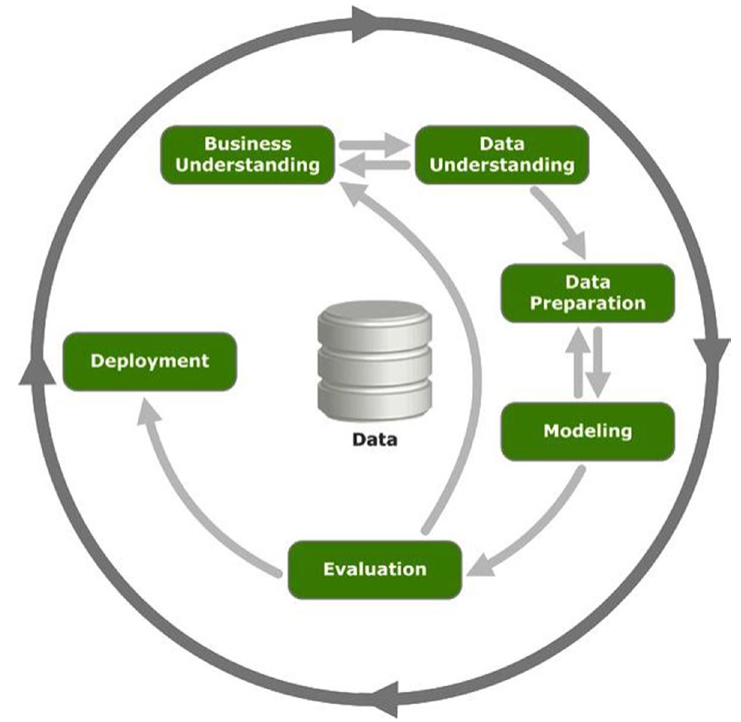</br> Figure 1. The six phases of data mining lifecycle with the CRISP-DM model.

This model is not a rigid imposition but rather a framework to ensure keeping on the right track when going through the lifecycle  of any analytics project. 

Nevertheles, for this use case analysis I will try to follow as much as possible the very same order. Then instead of menctioning each of these CRISP-DM phases (see Srakar R., (2018)) I will each of them when and where they correspond.

[Return to Content of Customer Segmentation by K-Means](#1)

## 2 Customer Segmentation as part of Business Understanding
<a id='2'></a>

This is the initial phase before kick starting any project in full flow. However **this is one of the most important phases in the lifecycle!**. 
> 1 The main objective here starts with **understanding the business context and requirements for the problem to be solved at hand**.

> 2 Definition of business requirements is crucial to convert the business problem into a **data mining or analytics problem**.

> 3 Once the business problem is defined clearly, the main tasks involved would be to **analyze and assess the current scenario with regard to the business problem definition**.

> 4 The **final deliverable** from this phase would be a detailed plan with the major milestones of the project and expected timelines along with success criteria, assumptions, constraints, caveats, and challenges.

<span style='background:gold'> For simplification reasons let's assume that the final delivery is to get an efficient and reliable Customer Segmentation.</span>

**Customer segmentation** is the problem of uncovering information about a firm’s customer base, based on their interactions with the business.</br> In most cases this interaction is in terms of their purchase behavior and patterns. We explore some of the ways in which this can be used.</br>
Many of the bussiness reasons beahind the Customer segmentation can be found in Liu K.(2022)

[Return to Content of Customer Segmentation by K-Means](#1)

## 3 Data Understanding
<a id='3'></a>

The online retail transactions dataset is available from the UCI Machine Learning Repository. http://archive.ics.uci.edu/ml/datasets/online+retail

The dataset we will be using for our analysis is quite simple. Based on its description on the UCI web site, it contains all the transactions occurring between **01/12/2010 (December first 2010) and 09/12/2011 (December nineth 2011)** for a **UK-based and registered non-store online retail**.</br></br> From the web site, we also learn that **the company sells unique all-occasion gift items** and a lot of customers of the organization are **wholesalers**.</br>
The last piece of information is particularly important as gives us an opportunity to explore purchase behaviors of large-scale customers instead of normal retail customers only.</br> The dataset does not have any information that will help us distinguish between a wholesale purchase and a retail purchase. 

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.1 Load libraries
<a id='3.1'></a>

In [1]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visualization
import matplotlib.pyplot as plt
#Numerical Python functions written for compatibility with MATLAB commands with the same names.
# Most numerical Python functions can be found in the NumPy and SciPy libraries. 
#What remains here (in mlab) is code for performing spectral computations
# and kernel density estimations.
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# import created Customer Segmentation Kit of functions
import UL_KMeansCustSeg_RA as CSK
# autoreload extension neccesary whenever CSK updates
%load_ext autoreload
%autoreload 2

%matplotlib inline

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2 Exploratory Data Analysis or EDA
<a id='3.2'></a>

Exploratory data analysis, also known as EDA, **is one of the first major analysis stages in the lifecycle**. Here, the main objective is to explore and understand the data in detail. You can make use of **descriptive statistics, plots, charts, and visualizations** to look at the various data attributes, find **associations and correlations** and **make a note of data quality problems if any**.

Following are some of the major tasks in this stage.

1• Explore, describe, and visualize data attributes</br>
2• Select data and attributes subsets that seem most important for the problem</br>
3• Extensive analysis to find correlations and associations and test hypotheses</br>
4• <span style='background:aqua'>Note missing data points if any</span></br>

Irrespective of the actual use case or the algorithm, it is convenient to implement an a standard analysis workflow, which should always start with exploratory data analysis (EDA).
The first thing to notice about the dataset is its format. Unlike most of the datasets this is not in a CSV format and instead comes as an Excel file. In some other languages (or even frameworks) it could have been a cause of problem but with python and particularly pandas we don’t face any such problem and we can read the dataset using the function `read_excel` provided
by the pandas library. We also take a look at some of the lines in the dataset.

### 3.2.1 Load and view the first Dataset 'cs_df'
<a id='3.2.1'></a>

In [2]:
cs_df = pd.read_excel(io=r'Online Retail.xlsx')

In [6]:
cs_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

From the above output of cs_df we notice a little bit more of half million (541,909) records or rows and 8 features

In [7]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.2 Attribute Information of 'cs_df'
<a id='4.2.2'></a>

Most attribute information can be obtained form the UCI repository. Nevertheles we include all what  Sarkar, et. al. (2018) can tell about this, as follows: The attributes of the dataset are easily identifiable from their names. We know right away what each of these fields might mean. For the sake of completeness, we include the description of each column below:

> 1 **InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
>> A unique identifier for the invoice. An invoice number shared across rows means that those transactions were performed in a single invoice (multiple purchases).

> 2 **StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
>>  Identifier for items contained in an invoice.

> 3 **Description**: Product (item) name. *Nominal*.
>> Textual description of each of the stock item.

> 4 **Quantity**: The quantities of each product (item) per transaction. *Numeric*.
>> The quantity of the item purchased.

> 5 **InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
>> Date of purchase.

> 6 **UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
>> Value of each item.

> 7 **CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
>> Identifier for customer making the purchase.

> 8 **Country**: Country name. *Nominal*, the name of the country where each customer resides.
>> Country of the customer.

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.3 Select data and attributes subsets of 'cs_df' that seem most important for the problem. 
<a id='3.2.3'></a>

#### 3.2.3.1 Determines the top `Country`ies the retailer is shipping its items to. 
<a id='3.2.3.1'></a>

Sarkar, D. (2018) decided to first analyze this data and **determine which are the top countries the retailer is shipping its items to**, and how are the volumes of sales for those countries.

In [9]:
# different countries
cs_df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [10]:
# number of different countries
len(cs_df.Country.unique())

38

In [11]:
# number of rows for each country
#cs_df.Country.value_counts().reset_index().head(n=10)
cs_df.Country.value_counts().head(n=20)

United Kingdom     495478
Germany              9495
France               8557
EIRE                 8196
Spain                2533
Netherlands          2371
Belgium              2069
Switzerland          2002
Portugal             1519
Australia            1259
Norway               1086
Italy                 803
Channel Islands       758
Finland               695
Cyprus                622
Sweden                462
Unspecified           446
Austria               401
Denmark               389
Japan                 358
Name: Country, dtype: int64

This shows us that the bulk of ordering is taking place in its home country only which is not surprising. We also notice the odd country name "EIRE", which is a little concerning. But a quick web search indicates that it is just an old name for **Ireland**. Australia is also in the top-ten list of sales by country. **Unspecified** might be of a little concern.

[Return to Content of Customer Segmentation by K-Means](#1)

#### 3.2.3.2 Determining the uniqueness of `CustomerID`. 
<a id='3.2.3.2'></a>

Next Sarkar, D. (2018) is interested in how many unique customers the retailer is having and how do they stack up in the number of orders they make.

In [13]:
cs_df.CustomerID.unique().shape

(4373,)

It is also  interesting knowing that what percentage of orders is made by the top 10 customers of the retailer. This information is interesting as it would tell us whether the
user base of the firm is distributed relatively uniformly

In [16]:
(cs_df.CustomerID.value_counts()/sum(cs_df.CustomerID.value_counts())*100).\
head(n=25).cumsum()

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
15005.0    10.799869
16033.0    11.083035
14056.0    11.360301
14769.0    11.629210
17511.0    11.893695
13081.0    12.154492
14527.0    12.403000
16549.0    12.644133
14456.0    12.884283
15719.0    13.114847
Name: CustomerID, dtype: float64

The two above output tells us that we have 4,373 unique customers, but there are signigicative diferences among them. For example the first 13 contribute less than 10% of total sales while the others contribute with at least the 10% each. This is expected given the fact that we have both wholesale and retail customers. 

[Return to Content of Customer Segmentation by K-Means](#1)

#### <span style='background:burlywood'>3.2.3.3 Determining the uniqueness of `StockCode` and `Description`. </span>
<a id='3.2.3.3'></a>

The next thing we want to determine is how many unique items the firm is selling and check whether we have equal number of descriptions for them.

In [17]:
cs_df.StockCode.unique().shape

(4070,)

In [18]:
cs_df.Description.unique().shape

(4224,)

We have **a mismatch** in the number (4224-4070=**154**) of `StockCode` and `Description`, as we can see that item descriptions are more than stock code values, which **means that we have multiple descriptions for some of the stock codes**.</br> 

<span style='background:lightyellow'> Although this is not going to interfere with our analysis</span> <span style='background:aquamarine'>(because these features will no be considered for the Customer Segmentation)</span>, we would like to dig a little deeper in this to find out what may have caused this issue or what kind of duplicated descriptions are present in the data.

In [19]:
# creates a DataFrame grouped by the keys of `StockCode` and `Description`
# and presenting a count of the remaining features
#cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()
cat_des_df = cs_df.groupby(["StockCode","Description"]).count()

[Return to Content of Customer Segmentation by K-Means](#1)

In [20]:
cat_des_df

InvoiceNo  Quantity  \
StockCode    Description                                                
10002        INFLATABLE POLITICAL GLOBE                  71        71   
10080        GROOVY CACTUS INFLATABLE                    22        22   
             check                                        1         1   
10120        DOGGY RUBBER                                30        30   
10125        MINI FUNKY DESIGN TAPES                     94        94   
...                                                     ...       ...   
gift_0001_20 to push order througha s stock was           1         1   
gift_0001_30 Dotcomgiftshop Gift Voucher £30.00           7         7   
gift_0001_40 Dotcomgiftshop Gift Voucher £40.00           3         3   
gift_0001_50 Dotcomgiftshop Gift Voucher £50.00           4         4   
m            Manual                                       1         1   

                                                  InvoiceDate  UnitPrice  \
StockCode    Description                                                   
10002        INFLATABLE POLITICAL GLOBE                    71         71   
10080        GROOVY CACTUS INFLATABLE                      22         22   
             check                                          1          1   
10120        DOGGY RUBBER                                  30         30   
10125        MINI FUNKY DESIGN TAPES                       94         94   
...                                                       ...        ...   
gift_0001_20 to push order througha s stock was             1          1   
gift_0001_30 Dotcomgiftshop Gift Voucher £30.00             7          7   
gift_0001_40 Dotcomgiftshop Gift Voucher £40.00             3          3   
gift_0001_50 Dotcomgiftshop Gift Voucher £50.00             4          4   
m            Manual                                         1          1   

                                                  CustomerID  Country  
StockCode    Description                                               
10002        INFLATABLE POLITICAL GLOBE                   49       71  
10080        GROOVY CACTUS INFLATABLE                     21       22  
             check                                         0        1  
10120        DOGGY RUBBER                                 30       30  
10125        MINI FUNKY DESIGN TAPES                      64       94  
...                                                      ...      ...  
gift_0001_20 to push order througha s stock was            0        1  
gift_0001_30 Dotcomgiftshop Gift Voucher £30.00            0        7  
gift_0001_40 Dotcomgiftshop Gift Voucher £40.00            0        3  
gift_0001_50 Dotcomgiftshop Gift Voucher £50.00            0        4  
m            Manual                                        0        1  

[4792 rows x 6 columns]

<span style='background:burlywood'>We can easily noticed that some rows of the `StockCode` do not correspond to the 5-digit integral number as it was informed on [3.2.2 Attribute Information of 'cs_df'](#3.2.2).</span>

In [9]:
cs_df.StockCode.describe(include='all')

count     541909
unique      4070
top       85123A
freq        2313
Name: StockCode, dtype: object

In [10]:
#the `.reset_index()` resets the two key indexes created by the `.groupby`
# then a dataframe is created with the output 
cat_des_df = cs_df.groupby(["StockCode","Description"]).count().reset_index()

In [22]:
cat_des_df

StockCode                          Description  InvoiceNo  Quantity  \
0            10002          INFLATABLE POLITICAL GLOBE          71        71   
1            10080             GROOVY CACTUS INFLATABLE         22        22   
2            10080                                check          1         1   
3            10120                         DOGGY RUBBER         30        30   
4            10125              MINI FUNKY DESIGN TAPES         94        94   
...            ...                                  ...        ...       ...   
4787  gift_0001_20  to push order througha s stock was           1         1   
4788  gift_0001_30   Dotcomgiftshop Gift Voucher £30.00          7         7   
4789  gift_0001_40   Dotcomgiftshop Gift Voucher £40.00          3         3   
4790  gift_0001_50   Dotcomgiftshop Gift Voucher £50.00          4         4   
4791             m                               Manual          1         1   

      InvoiceDate  UnitPrice  CustomerID  Country  
0              71         71          49       71  
1              22         22          21       22  
2               1          1           0        1  
3              30         30          30       30  
4              94         94          64       94  
...           ...        ...         ...      ...  
4787            1          1           0        1  
4788            7          7           0        7  
4789            3          3           0        3  
4790            4          4           0        4  
4791            1          1           0        1  

[4792 rows x 8 columns]

In [19]:
# get the number of Description per each different StockCode
cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].reset_index().head()

index  StockCode
0  20713          8
1  23084          7
2  21830          6
3  85175          6
4  85172          5

In [20]:
# we can see for example the 8 different descriptions for `StockCode`=20713
cat_des_df[cat_des_df.StockCode == 20713]

StockCode                   Description  InvoiceNo  Quantity  InvoiceDate  \
106     20713                         Found          1         1            1   
107     20713                JUMBO BAG OWLS        673       673          673   
108     20713               Marked as 23343          1         1            1   
109     20713                         found          1         1            1   
110     20713           wrongly coded 23343          1         1            1   
111     20713           wrongly coded-23343          1         1            1   
112     20713          wrongly marked 23343          1         1            1   
113     20713  wrongly marked. 23343 in box          1         1            1   

     UnitPrice  CustomerID  Country  
106          1           0        1  
107        673         427      673  
108          1           0        1  
109          1           0        1  
110          1           0        1  
111          1           0        1  
112          1           0        1  
113          1           0        1

In [22]:
cs_df[cs_df.StockCode == 20713]

InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
522       536409     20713  JUMBO BAG OWLS         1 2010-12-01 11:45:00   
1117      536527     20713  JUMBO BAG OWLS        10 2010-12-01 13:04:00   
1439      536542     20713  JUMBO BAG OWLS        30 2010-12-01 14:11:00   
6381      536938     20713  JUMBO BAG OWLS        20 2010-12-03 12:05:00   
7788      537054     20713  JUMBO BAG OWLS         3 2010-12-05 11:40:00   
...          ...       ...             ...       ...                 ...   
538154    581400     20713  JUMBO BAG OWLS         1 2011-12-08 13:36:00   
538601    581412     20713  JUMBO BAG OWLS         5 2011-12-08 14:38:00   
539382    581439     20713  JUMBO BAG OWLS         1 2011-12-08 16:30:00   
541327    581498     20713  JUMBO BAG OWLS         8 2011-12-09 10:26:00   
541810    581579     20713  JUMBO BAG OWLS        10 2011-12-09 12:19:00   

        UnitPrice  CustomerID         Country  
522          1.95     17908.0  United Kingdom  
1117         1.95     12662.0         Germany  
1439         1.95     16456.0  United Kingdom  
6381         1.95     14680.0  United Kingdom  
7788         1.95     16931.0  United Kingdom  
...           ...         ...             ...  
538154       2.08     14056.0  United Kingdom  
538601       2.08     14415.0  United Kingdom  
539382       4.13         NaN  United Kingdom  
541327       4.13         NaN  United Kingdom  
541810       1.79     17581.0  United Kingdom  

[684 rows x 8 columns]

In [27]:
# then we can compare `Description` from `cs_df` and `cat_des_df` for the first row 
# of `cat_des_df` which is precisely for the `StockCode`=20713
cs_df[cs_df['StockCode']
      ==cat_des_df.StockCode.value_counts()[cat_des_df.StockCode.value_counts()>1].\
      reset_index()['index'][0]]['Description'].unique()

array(['JUMBO BAG OWLS', nan, 'wrongly marked. 23343 in box',
       'wrongly coded-23343', 'found', 'Found', 'wrongly marked 23343',
       'Marked as 23343', 'wrongly coded 23343'], dtype=object)

We then notice about 9 different `Description`s for `StockCode`=20713 </br> We can also notice a possible cross reference with 23343

In [29]:
cat_des_df[cat_des_df.StockCode == 23343]

StockCode                   Description  InvoiceNo  Quantity  \
2592     23343                         20713          1         1   
2593     23343          20713 wrongly marked          1         1   
2594     23343  JUMBO BAG VINTAGE CHRISTMAS         496       496   
2595     23343           came coded as 20713          1         1   
2596     23343           wrongly coded 20713          2         2   

      InvoiceDate  UnitPrice  CustomerID  Country  
2592            1          1           0        1  
2593            1          1           0        1  
2594          496        496         403      496  
2595            1          1           0        1  
2596            2          2           0        2

This gives the multiple descriptions for one of those items and we witness the simple ways in which data quality can be corrupted in any dataset. A simple spelling mistake can end up in reducing data quality and an erroneous analysis. In an enterprise-level scenario, dedicated people work toward restoring data quality manually over time. 

<span style='background:burlywood'>Since the intent of this program is to focus on customer segmentation, we will be skipping this tedious activity for now.</span>

[Return to Content of Customer Segmentation by K-Means](#1)

#### <span style='background:burlywood'> 3.2.3.4 Exploring the integrity of `Quantity` and `UnitPrice`.</span>
<a id='3.2.3.4'></a>

Let’s now verify the sanctity of the `Quantity` and `UnitPrice` attributes, as those are the attributes we will be using in our analysis.

In [25]:
cs_df.Quantity.describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [30]:
cs_df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

<span style='background:burlywood'>We notice that both of these attributes are having **negative values**, which may mean that we may have some **return transactions** in our data also.</span>

This scenario is quite common for any retailer **but we need to handle these before we proceed to our analysis**.<span style='background:burlywood'> The return transactions will be handle in section 3.2.3.4.</span>

These are some of the data quality issues we have found so far in our dataset. In the real world, the datasets are generally messy and have considerable data quality issues, so it is always a good practice to explicitly verify information at hand before performing any kind of analysis.

### 3.2.4 Note Missing Values of 'cs_df'
<a id='3.2.4'></a>

So far we have notice: 
> 154 mismatchs between `StockCode` an `Description` and

> negative numbers of `Quantity` and `UnitPrices`

As part of the Data Understanding (phase 2 of CRISP-DM framework )[*1 The CRISP-DM Process Model*](#1) is the Exploratory Data Analysis or EDA [*3.2 Exporatory Data Analysis or EDA*](#3.2). And as part of the EDA is to note the missing data.

The cs_df output easily gives us some information about the attributes of the datasets. The attribute information can also help to get a more complete idea or knowledge about the data. 

For example from a `cd_df.info()` we can easily notice for missing values.

In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


From the above output of pd.info() we see 8 features. 4 features are object or string, 2 float, 1 int and 1 datetime. 

Many specified Nominal values correspond to object dtypes, but others correspond to float. These could be an indicator of possible need to convert some dtype features or Feaure Engineering.

Also we notice missing values.

For **Description** 541,909 - 540,455=**1,454** missing values, and for 

for **CustomerID** 541,909 - 406,829=**135,080** missing values

Lets take a look to some missing **Description** values. 

In [7]:
cs_df[cs_df['Description'].isnull()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

We have 1,454 rows of missing values. Noticing that many missing `Description` have also missing `CustomerID`.
So lets verify if this applies for all of the missing `Description`.

In [36]:
cs_df[cs_df['Description'].isnull() & cs_df['CustomerID'].isnull()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

From the above we can confirm that all missing `Description` have missing `CustomerID`

Now lets take a look for missing **CustomerID** values.

In [37]:
cs_df[cs_df['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

We have a considerable number of rows with missing **CustomerID** (135,080 as we calculated before). We also notice repeated `InvoiceNo`.

<span style='background:burlywood'>  Then according to the [3.2.2 Attribute Information of 'cs_df'](#3.2.2) this implies multiple purchases. But this do not seems to explain the missing `CustomerID` values</span>

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5 Data Cleaning of 'cs_df'
<a id='3.2.5'></a>

Data quality analysis is the final stage in the data understanding phase where we analyze the quality of data in our datasets and document potential errors, shortcomings, and issues that need to be resolved before analyzing the data further or starting modeling efforts. The main focus on data quality analysis involves the following.</br>
• Missing values</br>
• Inconsistent values</br>
• Wrong information due to data errors (manual/automated)</br>
• Wrong metadata information</br>

From the above seems we are done. So we should take data cleaning actions.

Regarding missing values, Swamynathan (2019) menctions a couple important things on this regard:<br>
> I. There are four most commonly used techniques for missing data imputation:<br> 
 >> 1) Delete.
 >> 2) Replace values with the summary (i.e.mean, mode, etc.).
 >> 3) Random replace.
 >> 4) Using a predictive model.
    
> II. Less than 5% of number of missing values row count is **insignificant** compared with the overall record count.

Then lets get the percentajes of missing data for `Description` and `CustomerID`

In [38]:
#Lets first calculate  the percentajes
print("Description", 100-((540455*100)/541909), "% of total row count")
print("CustomerID", 100-((406829*100)/541909), "% of total row count")

Description 0.26831073113751813 % of total row count
CustomerID 24.926694334288598 % of total row count


So considering Swamynathan recommendations, the `Description` missing values can be removed without harm due to ares less than 1% of total row count.

Nevertheless, for `CustomerID` there are nearly 25% missing values of its total row count!!!. So it definitely needs some data imputation technique.

I will use a predictive model technique for missing data imputation.

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.1 Droping `Description` missing values 
<a id='3.2.5.1'></a>

In [3]:
# creates a new DataFrame containing NOT missing Description Values
cs_df.dropna(subset=['Description'],inplace=True)

In [6]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [13]:
print('After droping the',1452,'`Description` missing values, we have ',
      541909-1454,'records') 

After droping the 1452 `Description` missing values, we have  540455 records


Then we create another dataframe in case we like or have to work with the original dataframe (`cs_df` with Not`Description` missing values) similar to the used by Sarkar et. al. (2018).

In [8]:
# copy cs_df
cs1=cs_df.copy()
cs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [2]:
# Function to get 'cs1' and `cs_df` for the situations where 
# we are not following from the all above sequential flow.
# So in case we need to start the analysis from 3.2.5.2.
# we then start by getting `cs1` as a df whitout `Description` nulls
#  It is also needed to run 3.2.1 first to load libraries
cs1=CSK.get_csdf_NoDescNuls()
cs_df=cs1.copy()
# drops CustomerID nulls
# cs_df.dropna(subset=['CustomerID'],inplace=True)

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.2 Converting features to numerical dtype (optional)
<a id='3.2.5.2'></a>

To implement a predictive modeling technique similar to sklearn's multivariate IterativeImputer, it is first necessary to convert any feature to a numeric type which is to be included in the model.

From **Swamynathan, 2019**:
> "Most of the ML libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building."<br>
>Some of the common methods of handling categorical data based on their number of levels, provided by Scikit-learn functions are:<br>
>> Create a **dummy variable** (also know as "**One Hot Encoder**"): This is a Boolean variable that indicates the presence of a category with the value 1 and 0 for absence.

>>**Convert to number** (also know as "**Label Encoder**"): Another simple method is to represent the text description of each level with a number by using the Label Encoder function

By applying a multivariate IterativeImputer this use case study mainly differentiates from Sarkar et. al. (2018) as they decided to delete all the missing `CustomerID` rows. 

Then we proceed to convert the non-numerical features to a numerical ones.

[Return to Content of Customer Segmentation by K-Means](#1)

#### 3.2.5.2.1 Create a dataframe `cs1` of factorized features
<a id='3.2.5.2.1'></a>

We factorized non numerical  fetures to numerical in order to impute missing `CustomerID` values

In [36]:
# we first check our dataframe which as not `Description` nulls
cs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


In [37]:
# also we take a look to cs1 before factorizing
# their 5 non numerical features 
# (InvoiceNo, StockCode, Description, InvoiceDate, Country)
cs1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [38]:
## Then we do "Feature Engineering" on non numerical dtype
# Creates Factorized features from not numerical features
cs1[['InvoiceNoFact','StockCodeFact','DescriptionFact',
      'InvoiceDateFact','CountryFact']]\
       = cs1[['InvoiceNo','StockCode',
              'Description','InvoiceDate',
              'Country']].\
      apply(lambda x:pd.factorize(x)[0])

In [39]:
# then we might like to take a look CS1 with factorized features
cs1.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceNoFact  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom              0   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom              0   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom              0   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom              0   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom              0   

   StockCodeFact  DescriptionFact  InvoiceDateFact  CountryFact  
0              0                0                0            0  
1              1                1                0            0  
2              2                2                0            0  
3              3                3                0            0  
4              4                4                0            0

We indedd notice the last 5 non-numerical features and their numerical or factorized features with an ending "Fact" label

In [40]:
# we might also like to get the information report for `cs1`
cs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        540455 non-null  object        
 1   StockCode        540455 non-null  object        
 2   Description      540455 non-null  object        
 3   Quantity         540455 non-null  int64         
 4   InvoiceDate      540455 non-null  datetime64[ns]
 5   UnitPrice        540455 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          540455 non-null  object        
 8   InvoiceNoFact    540455 non-null  int64         
 9   StockCodeFact    540455 non-null  int64         
 10  DescriptionFact  540455 non-null  int64         
 11  InvoiceDateFact  540455 non-null  int64         
 12  CountryFact      540455 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 57.7+ 

`cs1` has 13 features

[Return to Content of Customer Segmentation by K-Means](#1)

#### 3.2.5.2.2 Create a dataframe `cs1_CIdN` of `CustomerID` nulls or missing values.
<a id='3.2.5.2.2'></a>

In [41]:
# it might be useful to have a dataframe of `CustomerID` missing values
cs1_CIdN=cs1[cs1.CustomerID.isnull()]
cs1_CIdN

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  \
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom   
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom   
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom   
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom   
1447   2010-12-01 14:32:00       1.66         NaN  United Kingdom   
...                    ...        ...         ...             ...   
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom   
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom   
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom   
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom   
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom   

        InvoiceNoFact  StockCodeFact  DescriptionFact  InvoiceDateFact  \
1443               88            776              777               77   
1444               88            777              778               77   
1445               88            174              174               77   
1446               88            778              779               77   
1447               88            405              406               77   
...               ...            ...              ...              ...   
541536          24420            140              140            22284   
541537          24420             60               60            22284   
541538          24420            238              239            22284   
541539          24420           1121             1121            22284   
541540          24420            952              952            22284   

        CountryFact  
1443              0  
1444              0  
1445              0  
1446              0  
1447              0  
...             ...  
541536            0  
541537            0  
541538            0  
541539            0  
541540            0  

[133626 rows x 13 columns]

We see 133,626 `CustomerID` missing values

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3 Imputing `CustomerID` missing values
<a id='3.2.5.3'></a>

Once we have the desired features in numerical dtype(factorized features in 3.2.5.2.1), we can create another dataframe with all the features only in numerical type so we can use later the iterative imputer more easily.

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3.1 Create a dataframe `cs1F` of only numerical features
<a id='3.2.5.3.1'></a>

In [42]:
# creates a new dataframe of only numerical features
cs1F=cs1[['InvoiceNoFact','StockCodeFact','DescriptionFact',
          'Quantity','InvoiceDateFact','UnitPrice',
          'CustomerID','CountryFact']].copy()

In [43]:
cs1F

InvoiceNoFact  StockCodeFact  DescriptionFact  Quantity  \
0                   0              0                0         6   
1                   0              1                1         6   
2                   0              2                2         8   
3                   0              3                3         6   
4                   0              4                4         6   
...               ...            ...              ...       ...   
541904          24445           2037             2017        12   
541905          24445            415              416         6   
541906          24445           3217             3211         4   
541907          24445           3220             3217         4   
541908          24445           2377             2347         3   

        InvoiceDateFact  UnitPrice  CustomerID  CountryFact  
0                     0       2.55     17850.0            0  
1                     0       3.39     17850.0            0  
2                     0       2.75     17850.0            0  
3                     0       3.39     17850.0            0  
4                     0       3.39     17850.0            0  
...                 ...        ...         ...          ...  
541904            22308       0.85     12680.0            1  
541905            22308       2.10     12680.0            1  
541906            22308       4.15     12680.0            1  
541907            22308       4.15     12680.0            1  
541908            22308       4.95     12680.0            1  

[540455 rows x 8 columns]

`Quantity` and `UnitPrice` not being factorized could help to predict wiht more accuracy the missing `CustomerID` as those features have a more real and diverse values.

In [44]:
# verifying the Dtype of the features
cs1F.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNoFact    540455 non-null  int64  
 1   StockCodeFact    540455 non-null  int64  
 2   DescriptionFact  540455 non-null  int64  
 3   Quantity         540455 non-null  int64  
 4   InvoiceDateFact  540455 non-null  int64  
 5   UnitPrice        540455 non-null  float64
 6   CustomerID       406829 non-null  float64
 7   CountryFact      540455 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 37.1 MB


In [45]:
# verifying the description of `CustomerID` before the imputation
cs1F.CustomerID.describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

We see the `CustomerID` minimum=12346, maximum=18287 and mean=15287

In [46]:
print('CustomerID minimum=',cs1F.CustomerID.min(),
     'CustomerID maximum=',cs1F.CustomerID.max())

CustomerID minimum= 12346.0 CustomerID maximum= 18287.0


In [47]:
# verifying the different `CustomerID`
len(cs1F.CustomerID.unique())

4373

We still having the same number of `CustomerID` as in the original dataframe `cs_df` i.e. 4373 unique

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3.2 Impute `CustomerID` missing values with `IterativeImputer` on `cs1F` 
<a id='3.2.5.3.2'></a>

The `sklearn.impute.IterativeImputer` is a **Multivariate imputer** that estimates each feature from all the others.

The IterativeImputer implements a strategy for imputing missing values by modeling each feature with missing values as a function of other features in a **round-robin** fashion.

The Iterative Imputation is useful only when working with multivariate data. The IterativeImputer in scikit-learn utilizes the data available in other features in order to estimate the missing values being imputed. It does so through an…

*iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X.*

*A regressor is fit on (X, y) for known y.*

*Then, the regressor is used to predict the missing values of y.*

*This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.*

source: https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38

The imputation strategy can easily be changed between one of the following four options simply by altering the strategy argument:

> "mean" — replaces missing values with the mean

> "median" — replaces missing values with the median

> "most_frequent" — replaces missing values with the most frequent value

>"constant" — replaces missing values with whatever value is specified in the fill_value argument. This could be useful in a scenario in which you want to replace missing values with a string saying “missing” rather than an actual value.

source: https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [49]:
# creates an instance of the IterativeImputer with the enclosed parameters
# min and max values are indicated with the purpose to
# restrict the imputation for a known or existant `CustomerID`
ItImper=IterativeImputer(initial_strategy='most_frequent', 
                         min_value=12346,max_value=18287,
                         verbose=2, random_state=0)

In [50]:
# with the model of ItImper trains and trasnform (fit_transform)
# the whole dataframe `cs_op1_fact` returning a numpy ndarray (Imputed)
# with the transformed or imputed values
Imputed=ItImper.fit_transform(cs1F)

[IterativeImputer] Completing matrix with shape (540455, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 2.11
[IterativeImputer] Change: 5495.0, scaled tolerance: 80.995 
[IterativeImputer] Ending imputation round 2/10, elapsed time 4.17
[IterativeImputer] Change: 0.0, scaled tolerance: 80.995 
[IterativeImputer] Early stopping criterion reached.


In [51]:
# gets the shape of Imputed returned array
Imputed.shape

(540455, 8)

In [52]:
Imputed

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.5500e+00, 1.7850e+04,
        0.0000e+00],
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 3.3900e+00, 1.7850e+04,
        0.0000e+00],
       [0.0000e+00, 2.0000e+00, 2.0000e+00, ..., 2.7500e+00, 1.7850e+04,
        0.0000e+00],
       ...,
       [2.4445e+04, 3.2170e+03, 3.2110e+03, ..., 4.1500e+00, 1.2680e+04,
        1.0000e+00],
       [2.4445e+04, 3.2200e+03, 3.2170e+03, ..., 4.1500e+00, 1.2680e+04,
        1.0000e+00],
       [2.4445e+04, 2.3770e+03, 2.3470e+03, ..., 4.9500e+00, 1.2680e+04,
        1.0000e+00]])

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3.3 Creates a new dataframe `cs1i` with the array of Imputed values 
<a id='3.2.5.3.3'></a>

Having the Imputed values we create the dataframe to contain the imputed values.

In [53]:
# creates a new dataframe `cs1i` with the NaN's array of Imputed values
# the column names (parameter `columns`) for `cs1i` are taken from `cs1F`
# which is the used dataframe for the imputation
# the imputed values are those missing `CustomerID` values that really changed 
cs1i=pd.DataFrame(Imputed, columns=cs1F.columns)

In [54]:
cs1i

InvoiceNoFact  StockCodeFact  DescriptionFact  Quantity  \
0                 0.0            0.0              0.0       6.0   
1                 0.0            1.0              1.0       6.0   
2                 0.0            2.0              2.0       8.0   
3                 0.0            3.0              3.0       6.0   
4                 0.0            4.0              4.0       6.0   
...               ...            ...              ...       ...   
540450        24445.0         2037.0           2017.0      12.0   
540451        24445.0          415.0            416.0       6.0   
540452        24445.0         3217.0           3211.0       4.0   
540453        24445.0         3220.0           3217.0       4.0   
540454        24445.0         2377.0           2347.0       3.0   

        InvoiceDateFact  UnitPrice  CustomerID  CountryFact  
0                   0.0       2.55     17850.0          0.0  
1                   0.0       3.39     17850.0          0.0  
2                   0.0       2.75     17850.0          0.0  
3                   0.0       3.39     17850.0          0.0  
4                   0.0       3.39     17850.0          0.0  
...                 ...        ...         ...          ...  
540450          22308.0       0.85     12680.0          1.0  
540451          22308.0       2.10     12680.0          1.0  
540452          22308.0       4.15     12680.0          1.0  
540453          22308.0       4.15     12680.0          1.0  
540454          22308.0       4.95     12680.0          1.0  

[540455 rows x 8 columns]

In [55]:
# to get the new unique number of `CustomerID`
len(cs1i.CustomerID.unique())

137421

We notice a lot of "new" `CustomerID` created. So we round those `CustomerID` to reduce the number and aproximate to those pre-existant ones.

In [56]:
# round up or down to nearest integer
cs1i['CustomerID']=cs1i['CustomerID'].round(0).astype('int64')
# https://stackoverflow.com/questions/49153253/pandas-rounding-when-converting-float-to-integer

In [57]:
# get the uniqueness number of `CustomerID`
cs1i.CustomerID.unique().shape

(4448,)

In [58]:
dif=(len(cs1i.CustomerID.unique()) - len(cs1F.CustomerID.unique()))
dif

75

In [59]:
print("Orginal Unique CustomerID number: ",len(cs1F.CustomerID.unique()),"\n",
      "Number of Unique CustomerID after imputation: ", 
      len(cs1i.CustomerID.unique()),"\n",
      "New number of Unique CustomerID : ",dif,"\n",
     "Aprox. Percentaje of change of CustomerID uniqueness: ",
      round(((dif*100)/len(cs1F.CustomerID.unique())),0),"%")

Orginal Unique CustomerID number:  4373 
 Number of Unique CustomerID after imputation:  4448 
 New number of Unique CustomerID :  75 
 Aprox. Percentaje of change of CustomerID uniqueness:  2.0 %


In [60]:
cs1i.CustomerID.describe()

count    540455.000000
mean      15313.836697
std        1491.145748
min       12346.000000
25%       14341.000000
50%       15403.000000
75%       16261.000000
max       18287.000000
Name: CustomerID, dtype: float64

We now have for `CustomerID`: minimum=12346, maximum=18287 and a mean=15313 which is a little bit biger than before of 15287

The min and max still the same. And now the new `CustomerID` are much less. So only 75 new `CustomerID` were created.

Then, while not perfect, the IterativeImputer might result in a value somewhat close to the “true” values of the previously existant `CustomerID`. So we have to decide for what trade off to choose, either between deleting the missing `CustomerID` and possibly loosing important information, or imputing the missing `CustomerID` and adding 75 new `CustomerID` which implies a bias of about 2% from total orginal `CustomerID` values.

In [61]:
# verifies that there are no more missing values
cs1i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNoFact    540455 non-null  float64
 1   StockCodeFact    540455 non-null  float64
 2   DescriptionFact  540455 non-null  float64
 3   Quantity         540455 non-null  float64
 4   InvoiceDateFact  540455 non-null  float64
 5   UnitPrice        540455 non-null  float64
 6   CustomerID       540455 non-null  int64  
 7   CountryFact      540455 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 33.0 MB


[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3.4 Creates a new dataframe `cs2` by merging `cs_df` and `cs1i`  
<a id='3.2.5.3.4'></a>

One purpouse of `cs2`  is to serve (among many others uses) as reference to compare the object features of original `cs_df` (whitout the Description missing values) against their factorized values of `cs1F` and to notice the `CustomerID` imputated values.

In [62]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.1+ MB


the `cs_op2` will have the 8 original features (from `cs_df_op1`) AND the 8 numerical features (including the 5 factorized ones) used for the missing `CustomerID` imputation (`cs1i`).

In [63]:
cs2=pd.merge(cs_df,cs1i, left_index=True, right_index=True)
cs2.head()

InvoiceNo StockCode                          Description  Quantity_x  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER           6   
1    536365     71053                  WHITE METAL LANTERN           6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER           8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE           6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.           6   

          InvoiceDate  UnitPrice_x  CustomerID_x         Country  \
0 2010-12-01 08:26:00         2.55       17850.0  United Kingdom   
1 2010-12-01 08:26:00         3.39       17850.0  United Kingdom   
2 2010-12-01 08:26:00         2.75       17850.0  United Kingdom   
3 2010-12-01 08:26:00         3.39       17850.0  United Kingdom   
4 2010-12-01 08:26:00         3.39       17850.0  United Kingdom   

   InvoiceNoFact  StockCodeFact  DescriptionFact  Quantity_y  InvoiceDateFact  \
0            0.0            0.0              0.0         6.0              0.0   
1            0.0            1.0              1.0         6.0              0.0   
2            0.0            2.0              2.0         8.0              0.0   
3            0.0            3.0              3.0         6.0              0.0   
4            0.0            4.0              4.0         6.0              0.0   

   UnitPrice_y  CustomerID_y  CountryFact  
0         2.55         17850          0.0  
1         3.39         17850          0.0  
2         2.75         17850          0.0  
3         3.39         17850          0.0  
4         3.39         17850          0.0

In [65]:
cs2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539001 entries, 0 to 540454
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        539001 non-null  object        
 1   StockCode        539001 non-null  object        
 2   Description      539001 non-null  object        
 3   Quantity_x       539001 non-null  int64         
 4   InvoiceDate      539001 non-null  datetime64[ns]
 5   UnitPrice_x      539001 non-null  float64       
 6   CustomerID_x     406379 non-null  float64       
 7   Country          539001 non-null  object        
 8   InvoiceNoFact    539001 non-null  float64       
 9   StockCodeFact    539001 non-null  float64       
 10  DescriptionFact  539001 non-null  float64       
 11  Quantity_y       539001 non-null  float64       
 12  InvoiceDateFact  539001 non-null  float64       
 13  UnitPrice_y      539001 non-null  float64       
 14  CustomerID_y     539

In [67]:
# get the cs2 columns so we can rearrange the features order
cs2.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity_x', 'InvoiceDate',
       'UnitPrice_x', 'CustomerID_x', 'Country', 'InvoiceNoFact',
       'StockCodeFact', 'DescriptionFact', 'Quantity_y', 'InvoiceDateFact',
       'UnitPrice_y', 'CustomerID_y', 'CountryFact'],
      dtype='object')

In [68]:
# reorders the cs2 features
cs2=cs2[['InvoiceNo','InvoiceNoFact','StockCode','StockCodeFact',
               'Description','DescriptionFact','Quantity_x','Quantity_y',
               'InvoiceDate','InvoiceDateFact','UnitPrice_x','UnitPrice_y',
               'CustomerID_x','CustomerID_y','Country','CountryFact']]

In [69]:
cs2.head()

InvoiceNo  InvoiceNoFact StockCode  StockCodeFact  \
0    536365            0.0    85123A            0.0   
1    536365            0.0     71053            1.0   
2    536365            0.0    84406B            2.0   
3    536365            0.0    84029G            3.0   
4    536365            0.0    84029E            4.0   

                           Description  DescriptionFact  Quantity_x  \
0   WHITE HANGING HEART T-LIGHT HOLDER              0.0           6   
1                  WHITE METAL LANTERN              1.0           6   
2       CREAM CUPID HEARTS COAT HANGER              2.0           8   
3  KNITTED UNION FLAG HOT WATER BOTTLE              3.0           6   
4       RED WOOLLY HOTTIE WHITE HEART.              4.0           6   

   Quantity_y         InvoiceDate  InvoiceDateFact  UnitPrice_x  UnitPrice_y  \
0         6.0 2010-12-01 08:26:00              0.0         2.55         2.55   
1         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   
2         8.0 2010-12-01 08:26:00              0.0         2.75         2.75   
3         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   
4         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   

   CustomerID_x  CustomerID_y         Country  CountryFact  
0       17850.0         17850  United Kingdom          0.0  
1       17850.0         17850  United Kingdom          0.0  
2       17850.0         17850  United Kingdom          0.0  
3       17850.0         17850  United Kingdom          0.0  
4       17850.0         17850  United Kingdom          0.0

From the above output of `cs2.head()` we can see some of the factorized values for most features.

We first notice for example the same `InvoiceNo` for the same `CustomerID` which was not imputed.

Then we might like to get a bit more information of `InvoiceNo`=536365 so we can observe if all those invoices correspond to a single `CustomerID`

In [71]:
cs2[cs2['InvoiceNo'].eq(536365)]

InvoiceNo  InvoiceNoFact StockCode  StockCodeFact  \
0    536365            0.0    85123A            0.0   
1    536365            0.0     71053            1.0   
2    536365            0.0    84406B            2.0   
3    536365            0.0    84029G            3.0   
4    536365            0.0    84029E            4.0   
5    536365            0.0     22752            5.0   
6    536365            0.0     21730            6.0   

                           Description  DescriptionFact  Quantity_x  \
0   WHITE HANGING HEART T-LIGHT HOLDER              0.0           6   
1                  WHITE METAL LANTERN              1.0           6   
2       CREAM CUPID HEARTS COAT HANGER              2.0           8   
3  KNITTED UNION FLAG HOT WATER BOTTLE              3.0           6   
4       RED WOOLLY HOTTIE WHITE HEART.              4.0           6   
5         SET 7 BABUSHKA NESTING BOXES              5.0           2   
6    GLASS STAR FROSTED T-LIGHT HOLDER              6.0           6   

   Quantity_y         InvoiceDate  InvoiceDateFact  UnitPrice_x  UnitPrice_y  \
0         6.0 2010-12-01 08:26:00              0.0         2.55         2.55   
1         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   
2         8.0 2010-12-01 08:26:00              0.0         2.75         2.75   
3         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   
4         6.0 2010-12-01 08:26:00              0.0         3.39         3.39   
5         2.0 2010-12-01 08:26:00              0.0         7.65         7.65   
6         6.0 2010-12-01 08:26:00              0.0         4.25         4.25   

   CustomerID_x  CustomerID_y         Country  CountryFact  
0       17850.0         17850  United Kingdom          0.0  
1       17850.0         17850  United Kingdom          0.0  
2       17850.0         17850  United Kingdom          0.0  
3       17850.0         17850  United Kingdom          0.0  
4       17850.0         17850  United Kingdom          0.0  
5       17850.0         17850  United Kingdom          0.0  
6       17850.0         17850  United Kingdom          0.0

The above output gives a hint that an `InvoiceNo` should be unique for a particular `CustomerID`

In [72]:
# then we could get more information regarding if the `InvoiceNo` could and should
# be unique for a determined `CustomerID`
cs_df.groupby(["InvoiceNo","CustomerID"]).count()

StockCode  Description  Quantity  InvoiceDate  \
InvoiceNo CustomerID                                                  
536365    17850.0             7            7         7            7   
536366    17850.0             2            2         2            2   
536367    13047.0            12           12        12           12   
536368    13047.0             4            4         4            4   
536369    13047.0             1            1         1            1   
...                         ...          ...       ...          ...   
C581484   16446.0             1            1         1            1   
C581490   14397.0             2            2         2            2   
C581499   15498.0             1            1         1            1   
C581568   15311.0             1            1         1            1   
C581569   17315.0             2            2         2            2   

                      UnitPrice  Country  
InvoiceNo CustomerID                      
536365    17850.0             7        7  
536366    17850.0             2        2  
536367    13047.0            12       12  
536368    13047.0             4        4  
536369    13047.0             1        1  
...                         ...      ...  
C581484   16446.0             1        1  
C581490   14397.0             2        2  
C581499   15498.0             1        1  
C581568   15311.0             1        1  
C581569   17315.0             2        2  

[22190 rows x 6 columns]

The above output sugests that indeed the `InvoiceNo` could and should be unique for a determined `CustomerID`

Now, we can take a look to some previously identified missing `CustomerID` values in [3.2.5.2.2 Create a dataframe `cs1_CIdN` of `CustomerID` missing values.](#3.2.5.2.2) to observe some examples of their imputated values. 

In [73]:
# selects from `cs_op2` its indexes from 1443 to 1450, and all of its columns
cs2.iloc[ 1443:1450, ]

InvoiceNo  InvoiceNoFact StockCode  StockCodeFact  \
1444    536544           88.0     21774          174.0   
1445    536544           88.0     21786          778.0   
1446    536544           88.0     21787          405.0   
1447    536544           88.0     21790           32.0   
1448    536544           88.0     21791          779.0   
1449    536544           88.0     21801          780.0   
1450    536544           88.0     21802          781.0   

                              Description  DescriptionFact  Quantity_x  \
1444      DECORATIVE CATS BATHROOM BOTTLE            174.0           2   
1445                   POLKADOT RAIN HAT             779.0           4   
1446                RAIN PONCHO RETROSPOT            406.0           2   
1447                   VINTAGE SNAP CARDS             32.0           9   
1448   VINTAGE HEADS AND TAILS CARD GAME             780.0           2   
1449  CHRISTMAS TREE DECORATION WITH BELL            781.0          10   
1450      CHRISTMAS TREE HEART DECORATION            782.0           9   

      Quantity_y         InvoiceDate  InvoiceDateFact  UnitPrice_x  \
1444         4.0 2010-12-01 14:32:00             77.0         2.51   
1445         2.0 2010-12-01 14:32:00             77.0         0.85   
1446         9.0 2010-12-01 14:32:00             77.0         1.66   
1447         2.0 2010-12-01 14:32:00             77.0         1.66   
1448        10.0 2010-12-01 14:32:00             77.0         2.51   
1449         9.0 2010-12-01 14:32:00             77.0         0.43   
1450        11.0 2010-12-01 14:32:00             77.0         0.43   

      UnitPrice_y  CustomerID_x  CustomerID_y         Country  CountryFact  
1444         0.85           NaN         15423  United Kingdom          0.0  
1445         1.66           NaN         15425  United Kingdom          0.0  
1446         1.66           NaN         15424  United Kingdom          0.0  
1447         2.51           NaN         15423  United Kingdom          0.0  
1448         0.43           NaN         15425  United Kingdom          0.0  
1449         0.43           NaN         15425  United Kingdom          0.0  
1450         0.43           NaN         15425  United Kingdom          0.0

<span style='background:burlywood'> From the above we notice the same `InvoiceNo` but different imputated `CustomerID_y` values. The information provided in [3.2.2 Attribute Information of 'cs_df'](#3.2.2) only menctions that "An invoce number shared across rows means that those transactions were performed in a single invoice (multiple transactions)". But it does not menction if those multiple transactions are assumed to be for the same `CustomerID`.</span> 

<span style='background:beige'> Then, for now we will assume that those multiple transactions but with same `InvoiceNo` should in turn correspond to a same `CustomerID_y` values.</span>

Then our imputation might not be so good as we would like to. On the contrary, it might bias very badly our future work. So in this case we should better continue or analysis with a dataframe that drop those 153,080 `CustomerID` missing values.

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.3.5 Creates `cs3` as not very reliable but for possible comparisons with `cs_df`  
<a id='3.2.5.3.5'></a>

Nevertheless, in case we like compare results, we can create a dataframe "not very reliable"

In [101]:
# we can now have a new working dataframe without missing `CustomerID`
# the new df will preserve the dtype for most of their features as the 
# first `cs_df`
cs3=cs2[['InvoiceNo','StockCode','Description',
                       'Quantity_x','InvoiceDate','UnitPrice_x',
                       'CustomerID_y', 'Country']].copy()
cs3

InvoiceNo StockCode                          Description  Quantity_x  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER           6   
1         536365     71053                  WHITE METAL LANTERN           6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER           8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE           6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.           6   
...          ...       ...                                  ...         ...   
540450    581491     23571        TRADITIONAL NAUGHTS & CROSSES          12   
540451    581492     23369    SET 36 COLOUR PENCILS LOVE LONDON           2   
540452    581492     23370       SET 36 COLOURING PENCILS DOILY           2   
540453    581492     23371      SET 36 COLOUR PENCILS SPACEBOY            3   
540454    581492     23372     SET 36 COLOUR PENCILS DOLLY GIRL           1   

               InvoiceDate  UnitPrice_x  CustomerID_y         Country  
0      2010-12-01 08:26:00         2.55         17850  United Kingdom  
1      2010-12-01 08:26:00         3.39         17850  United Kingdom  
2      2010-12-01 08:26:00         2.75         17850  United Kingdom  
3      2010-12-01 08:26:00         3.39         17850  United Kingdom  
4      2010-12-01 08:26:00         3.39         17850  United Kingdom  
...                    ...          ...           ...             ...  
540450 2011-12-09 10:02:00         1.65         12680          Norway  
540451 2011-12-09 10:03:00         2.46         12680  United Kingdom  
540452 2011-12-09 10:03:00         2.46         12680  United Kingdom  
540453 2011-12-09 10:03:00         2.46         12680  United Kingdom  
540454 2011-12-09 10:03:00         2.46         12680  United Kingdom  

[539001 rows x 8 columns]

In [102]:
cs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539001 entries, 0 to 540454
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     539001 non-null  object        
 1   StockCode     539001 non-null  object        
 2   Description   539001 non-null  object        
 3   Quantity_x    539001 non-null  int64         
 4   InvoiceDate   539001 non-null  datetime64[ns]
 5   UnitPrice_x   539001 non-null  float64       
 6   CustomerID_y  539001 non-null  int64         
 7   Country       539001 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.0+ MB


[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.4 Separate data for UK, Remove missing `CustomerID` and Remove negative or return transactions
<a id='3.2.5.4'></a>

As one part of the EDA and [3.2.3 Select what seem important of 'cs_df' for the problem ](#3.2.3)  is to separate transactions for a particular geographical region only, as we don’t want data from Germany’s customers to affect the analysis for another country’s customers.
Then we focus on UK customers, which are notably the largest segment (based on country!).

In [3]:
# Separate data for one geography
cs_df = cs_df[cs_df.Country == 'United Kingdom']
cs_df.sample(5)

InvoiceNo StockCode                   Description  Quantity  \
256124    559457     23217   LAUREL HEART ANTIQUE SILVER        24   
305997    563730     22296     HEART IVORY TRELLIS LARGE        12   
269093    560434     90174           BUTTERFLY HAIR BAND         1   
208403    555111     84946  ANTIQUE SILVER T-LIGHT GLASS        12   
289423    562264     23285      PINK VINTAGE SPOT BEAKER         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
256124 2011-07-08 12:50:00       1.25     14918.0  United Kingdom  
305997 2011-08-18 17:43:00       1.65     14221.0  United Kingdom  
269093 2011-07-18 15:56:00       2.48         NaN  United Kingdom  
208403 2011-05-31 14:37:00       1.25     16434.0  United Kingdom  
289423 2011-08-03 16:14:00       1.63         NaN  United Kingdom

In [4]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494024 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    494024 non-null  object        
 1   StockCode    494024 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     494024 non-null  int64         
 4   InvoiceDate  494024 non-null  datetime64[ns]
 5   UnitPrice    494024 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      494024 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.9+ MB


From 539001 records we now have 494,024. Then we confirm UK as the largest number of records.

We also notice some client ID nulls(494,024 - 361,878 = 132,146), so we get rid of them as all our subsequent transactions will be based on the customer entities.

In [6]:
#drops `CustomerID` nulls
# an alternative operation will be:
# cs_df.dropna(subset=['CustomerID'],inplace=True)
# cs_df equals to itself but not nulls
cs_df = cs_df[~(cs_df.CustomerID.isnull())]
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    361878 non-null  object        
 1   StockCode    361878 non-null  object        
 2   Description  361878 non-null  object        
 3   Quantity     361878 non-null  int64         
 4   InvoiceDate  361878 non-null  datetime64[ns]
 5   UnitPrice    361878 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      361878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


Then we have now 361,878 records. But we still to do some more trimming on cd_df.

In section <span style='background:burlywood'> * [3.2.3.4 Exploring the integrity of `Quantity` and `UnitPrice`.](#3.2.3.4)</span></br>
was noticed negative values both for `Quantity` and `UnitPrice`, assuming were **return transactions** that we have in our dataset.

Then as part of the EDA and Data Cleaning as well, we will find out all such transactions and remove them.

Another possibility is to remove the matching buying transactions also from the dataset. But we will assume that those transactions are still important hence we will keep them intact.

To find out the return transactions we simply multiply `Quantity` and `UnitPrice` so that way any return will be a negative number. We also gain or create another needed feature labeled as `amount`

In [7]:
# Separate attribute for total amount
cs_df['amount'] = cs_df.Quantity*cs_df.UnitPrice

In [8]:
cs_df['amount'].describe()

count    361878.000000
mean         18.702086
std         451.918484
min     -168469.600000
25%           3.750000
50%          10.200000
75%          17.700000
max      168469.600000
Name: amount, dtype: float64

In [9]:
# Remove negative or return transactions
cs_df = cs_df[~(cs_df.amount<0)]

In [10]:
cs_df['amount'].describe()

count    354345.000000
mean         20.625073
std         326.033014
min           0.000000
25%           4.160000
50%          10.200000
75%          17.700000
max      168469.600000
Name: amount, dtype: float64

In [11]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
 8   amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


We now have our final `cs_df` almost ready for our modeling of Customer Segmentation. 

[Return to Content of Customer Segmentation by K-Means](#1)

### 3.2.5.4.1 Save to file data for UK "CSUK" ready for RFM Analysis
<a id='3.2.5.4.1'></a>

It will be good if we save this dataframe with a new name so we can get it latter in case we start from the phase 4 of data preparation.

In [12]:
CSUK=cs_df.copy()
CSUK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
 8   amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [13]:
CSUK.to_excel("CSUK.xlsx")

The next phase according to the **CRISP-DM model** is the **Data Preparation**, we should refresh a little bit or **Business Understanding** regarding the **Customer Segmentation** techniques. 

Then it migh be very convenient to include the what abouts of Customer Segmentation techniques as RFM Analysis within the phase of  Data Preparation. Or Data Preparation for RFM Analysis which in turn is the base for the Customer Segmentation.

[Return to Content of Customer Segmentation by K-Means](#1)

## 4 DATA PREPARATION FOR RFM ANALYSIS AND CUSTOMER SEGMENTATION Model
<a id='4'></a>

#### Customer Segmentation
**Segmentation** is the process of segregating any aggregated entity into separate parts or groups (segments).
These parts may or may not share something common across them.

**Customer segmentation** is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes.

It is driven by the belief that customers are inherently different and this difference is exemplified by their behavior.

A deep understanding of an organization’s customer base and their behavior
is often the focus of any customer segmentation project. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns. These differences can be on the basis of their buying behavior, their demographic information, their geographic information, their psychographic attributes, and so on.

Higher revenue is the most obvious and final **objective of any Customer Segmentation project**. Once having done the Customer Segmentation the organization will be able for example to **understand customer´s shoping behaviors** then the organizations will have the ability to focus marketing efforts more effectively
and efficiently. So the organization could devise **better marketing
campaigns** which are tailor made for the segments. Also a propper customer segmentation strategy can also help the firm with developing or offering new products, which may increase sales margin for the retailer or make the buying process more streamlined for the customer.

[Return to Content of Customer Segmentation by K-Means](#1)

#### Customer Segmentation strategies
As the customer segmentation it is basically just a way of differentiating between the customers, the strategies to do so can be as simple as making groups of customers based on age groups or other attributes (for example a **cohort analysis**) using manual process, using **EDA** with some programming languaje, or as complex as using a sophisticated algorithm (K-Means, DBSCAN, Gaussian mixture model, etc.) for finding out those segments in an automated fashion.

A **cohort** refers to individuals who share similar characteristics (e.g., gender, age, or culture) or a common experience during a specified period of time (e.g., a graduation cohort). For companies, cohort is usually referred to customer groups clustered with a certain timespan such as day, week, or month when they first make a purchase from the companies. A **Cohort analysis** is often used to compare the behaviour of different groups of people. As there is an abundance of data available to businesses today, cohort analysis has emerged as a useful analytical technique to analysing the behaviour of groups of customers over time. 

[Return to Content of Customer Segmentation by K-Means](#1)

#### Clustering for Customer Segmentation strategy
We are un a Unsupervised Learning (UL) domain when we have situations where the desired output class/event is unknown for historical data and the objective of such cases would be to study the patterns in the input dataset to get a better understanding and identify similar patterns that can be grouped into specific classes or events. 

Then the those UL algorithms which do not require any intervention from the subject matter experts beforehand (i.e. training, testing, predicting), they are called unsupervised learning.

A Clustering UL algorithm assumes that the classes are not known beforehand for a
given dataset. The goal here is to divide the input dataset into logical groups of related items.

Thus, for this use case, the most obvious method to perform customer segmentation is using UL methods like clustering. Hence, this will be the method that we use for customer segmentation.

The method is as simple as collecting as much data about the customers as possible in the form of **features or attributes** and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

Clustering is especially useful when we have a lot of attributes about the customer on which we can make different segments. Also, often it is observed
that a clustering-based segmentation will be superior to an arbitrary segmentation process and it will often encompass the segments that can be devised using such an arbitrary process.

Now that we have some information about what customer segmentation is, various strategies and how it can be useful, we can start with the process of finding out customer segments in our online retail dataset. 

The dataset that we have consists of only the sales transactions of the customers and no other information about them, i.e., no other additional attributes. Usually in larger organizations we will usually have more attributes of information about the customers that can help in clustering. So we will use a **RFM —Recency, Frequency and Monetary Value— based model** of customer value for finding our customer segments.

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.1 What Is RFM?
<a id='4.1'></a>

RFM stands for Recency, Frequency, and Monetary, each corresponding to some key customer values.

- **RECENCY (R)**: Time since last order
>The value of how recently a customer purchased at the establishment
- **FREQUENCY (F)**: Total number of orders or average time between orders
>How frequent the customer’s transactions are at the establishment
- **MONETARY VALUE (M)**: Total or average order value
>The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

A combination of these three values can be used to assign a value to the customer. We can directly think of some desirable segments that we would want on such model. For example, a high value customer is one who buys frequently, just bought something recently, and spends a high amount whenever he buys or shops.

RFM analysis is **a useful customer segmentation technique**, which has been widely adopted in marketing research. It can help categorize customers into various clusters and thus allowing businesses to target specific customer groups with tailored communications, engagement campaigns, and special treatment that are much more relevant for each group.

We will first introduce the basics of RFM analysis and use an example to demonstrate how we can perform the analysis in Python.

The three RFM metrics are important indicators of a customer’s behaviour as **they can reflect customer retention, engagement, and lifetime value**.

• **Recency** refers to how recent a customer has made a purchase. 
<span style='background:lightblue'>It measures the time elapsed since a customer’s last order or transaction with a business.</span> <span style='background:cyan'> A high **recency score** usually means that a customer has positively considered your business for a purchase decision over competitors.</span> It might be more likely that the customer will be responsive to communications and engagement campaigns from your business.

• **Frequency** refers to how often a customer makes a purchase. <span style='background:lightblue'> It can be measured with the total number of orders from a customer over a particular period of time or with average time between orders.</span> A high frequency score usually means that the customer is actively engaged and loyal to your business.

• **Monetary** refers to how much money a customer has spent in total or on average over a particular period of time.<span style='background:cyan'> A high monetary score usually means that the customer is a big spender to whom your business should pay close attention.</span>

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.2 What is RFM Analysis?
<a id='4.2'></a>

When performing customer segmentation, evaluating customers based on a single metric is insufficient and can be biased sometimes. For instance, an overseas tourist has made a recent visit to a retail store but will never come back again. Though the customer may have a high recency score, it can be difficult to retain this type of customers and thus, they cannot be regarded as best customers for the business.

RFM analysis combines the three different customer attributes and classifies customers with a numeric ranking of the three metrics, thus leading to a more balanced view. In general, customers with the highest overall score are considered best customers, depending on business contexts.

RFM analysis is a popular method for customer segmentation because it is simple to perform, and its output can be easily interpreted and understood. 

In particular, RFM can help address the following questions:
1. Who are the most valuable customers?
2. Who has the potential to become more valuable customers?
3. Which customers can be retained?
4. Which customers are more likely to respond to engagement campaigns?

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.3 Steps for RFM Analysis
<a id='4.3'></a>

There are certain steps to follow when performing an RFM analysis:
1. **Set RFM analysis scope** This is the step to determine the period that your RFM analysis to cover, for example, you can conduct RFM analysis for the past 3 or 6 months, or even longer. Of course, this also depends on the availability of your data. This step is important as it sets a reference date point for calculating the three R, F, M scores.

2. **Calculate R, F, M values** Once the scope is determined, you can calculate the R, F, and M values, respectively.

For instance, to calculate R, simply deduct a customer’s most recent purchase date from today’s date, the difference gives the R value (e.g., 1, 10, or 120 days). 

To calculate F, you can either calculate the total number of orders from a customer over a particular period of time, or use average
time between orders. Obviously, for the first option, the higher the better; whereas for the second option, the smaller the better. Likewise, for M value, you can either work out the total money a customer has spent during the timeframe, or use average money spent per order (see Table 5.2).

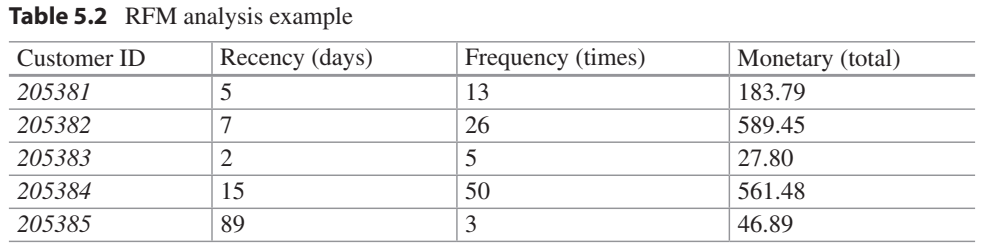

3. Convert R, F, M values to scale scores—this is the step in which we convert the three R, F, M values to scale scores. Different businesses may use different scales, while **the most common one is 1–5 scale**. To define the scales, we can set fixed ranges or work out quantiles based on the three respective R, F, M values.

To give you an example, we can divide the R value distribution into five equal groups using four quantiles (i.e., [0.2, 0.4, 0.6, 0.8]), and any values below the first 0.2 quantile value will be assigned a score of 5. 

Note here that a smaller R value means a more recent purchase/visit from customer, thus a high R scale score of 5. Similarly, we can calculate the quantiles for F and M values and then assign the scale scores to each customer.

4. **Apply RFM formula for aggregated RFM scores** you can stop at the previous stage, and simply use the individual R, F, M scale scores for customer segmentation (e.g., 1-1-1 for a low segment, and 555 for a high segment).

Alternatively, businesses can come up a formula of their own to derive an aggregated RFM score for each customer. For instance, using average of the three RFM scale scores or the sum. Depending on the nature of the business, you might introduce different weights for the three RFM variables to arrive at a more relevant RFM score to your business. For example, monetary value per transaction can be more important for a piano shop than the other two metrics, compared to a convenient store, where recency and frequency can be considered more important (Table 5.3).

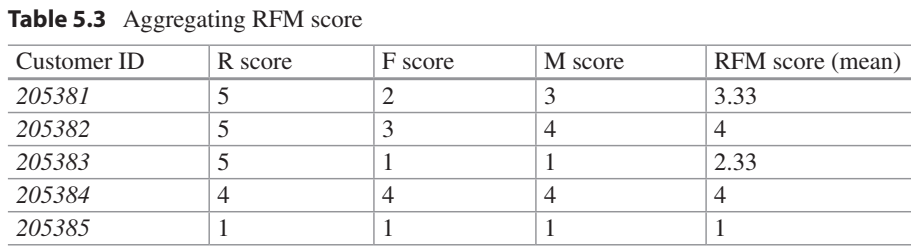

5. **Segment customers** The final step is to create customer segmentations based on the RFM scores.
Again, depending on the nature of the business, you can decide a most suitable way of dividing customers into different segments. See Table 5.4 for an illustrative example.

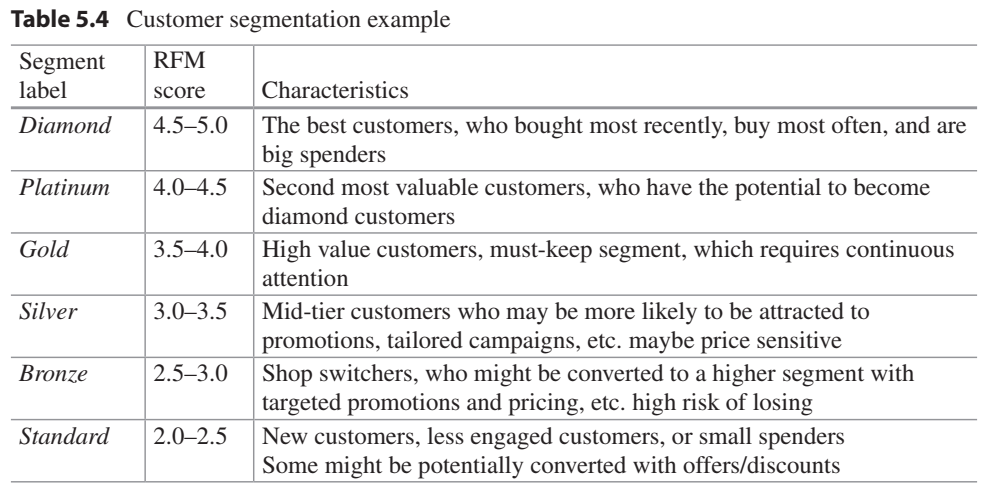

The example contains arbitrary labels and tiers, which should be tailored to suit the needs of a particular business. Using RFM segmentation, organizations can develop effective retention strategies and tactics for each segment. For instance, the top tier Diamond and Platinum segments are the most loyal customers who may be more willing to try your new products and promote your brand. The Silver and Bronze customers may be more sensitive to pricing and promotions. As such, your business can offer tailored promotions and targeted pricing strategies in order to retain them and potentially convert some of them to a higher tier segment.

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.4 RFM Analysis Example in Python
<a id='4.4'></a>

In this section, we go through an RFM analysis example in Python.
First, we need to load the data if we have not done yet.

In [2]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visualization
import matplotlib.pyplot as plt
#Numerical Python functions written for compatibility with MATLAB commands with the same names.
# Most numerical Python functions can be found in the NumPy and SciPy libraries. 
#What remains here (in mlab) is code for performing spectral computations
# and kernel density estimations.
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()
import math
from scipy.stats import norm

# import created Customer Segmentation Kit of functions
import UL_KMeansCustSeg_RA as CSK
# autoreload extension neccesary whenever CSK updates
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [18]:
# load the data
CSUK = pd.read_excel('CSUK.xlsx',index_col=0)
CSUK.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  amount  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom   15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom   22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom   20.34

In [19]:
CSUK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  int64         
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  int64         
 7   Country      354345 non-null  object        
 8   amount       354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 27.0+ MB


In [20]:
CSUK.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  354345.000000  354345.000000  354345.000000  354345.000000   
mean   560672.612341      12.048913       2.963793   15552.436219   
std     13168.988616     190.428127      17.862067    1594.546025   
min    536365.000000       1.000000       0.000000   12346.000000   
25%    549241.000000       2.000000       1.250000   14194.000000   
50%    561900.000000       4.000000       1.950000   15522.000000   
75%    572295.000000      12.000000       3.750000   16931.000000   
max    581586.000000   80995.000000    8142.750000   18287.000000   

              amount  
count  354345.000000  
mean       20.625073  
std       326.033014  
min         0.000000  
25%         4.160000  
50%        10.200000  
75%        17.700000  
max    168469.600000

It would be convenient to know how many records are for zero amount

In [28]:
CSUK[CSUK['amount'].eq(0)].count()

InvoiceNo      24
StockCode      24
Description    24
Quantity       24
InvoiceDate    24
UnitPrice      24
CustomerID     24
Country        24
amount         24
dtype: int64

We notice 24 records 

Next, to create the Recency feature variable, we need to decide the reference date for our analysis. For our use case, we will define the reference date as one day after the last transaction in our dataset. Then we like to know the date intervals

In [89]:
CSUK.InvoiceDate.describe()

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  354345
unique                  15615
top       2011-11-14 15:27:00
freq                      542
first     2010-12-01 08:26:00
last      2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

In [90]:
CSUK.InvoiceDate.describe(datetime_is_numeric=True)

count                           354345
mean     2011-07-11 08:05:04.229606656
min                2010-12-01 08:26:00
25%                2011-04-07 11:40:00
50%                2011-07-31 15:31:00
75%                2011-10-23 13:49:00
max                2011-12-09 12:49:00
Name: InvoiceDate, dtype: object

The dataset covers invoice dates from 2010-12-01 to 2011-12-09.
For simplicity, let us just take this whole period for our analysis. 

Now, we'll go through the RFM analysis step by step.

[Return to Content of Customer Segmentation by K-Means](#1)

### 4.4.1 Recency
<a id='4.4.1'></a>

To create the **Recency feature variable**, we need to decide the reference date for our analysis. For our use case, we will define the reference date as one day after the last transaction in our dataset.

In [4]:
# get the reference date
RefDate = CSUK.InvoiceDate.dt.date.max()
# updates the reference date adding one day after the last transaction in CSUK
RefDate = RefDate + dt.timedelta(days = 1)
RefDate

datetime.date(2011, 12, 10)

From the above we notice that `RefDate` type is datetime.date

Since `InvoiceDate` column contains time values, we need to convert the column to date only values (datetime.date):

In [5]:
# convert InvoicedDate to date only
CSUK.InvoiceDate = CSUK.InvoiceDate.dt.date

In [6]:
CSUK.head(2)

InvoiceNo StockCode                         Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                 WHITE METAL LANTERN         6   

  InvoiceDate  UnitPrice  CustomerID         Country  amount  
0  2010-12-01       2.55       17850  United Kingdom   15.30  
1  2010-12-01       3.39       17850  United Kingdom   20.34

We notice InvoiceDate has no more time values. Then we can update the CSUK info. and will discover that InvoiceDate is now an object Dtype instead of datetime as it was.

In [94]:
CSUK.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    354345 non-null  int64  
 1   StockCode    354345 non-null  object 
 2   Description  354345 non-null  object 
 3   Quantity     354345 non-null  int64  
 4   InvoiceDate  354345 non-null  object 
 5   UnitPrice    354345 non-null  float64
 6   CustomerID   354345 non-null  int64  
 7   Country      354345 non-null  object 
 8   amount       354345 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 27.0+ MB


Now we will construct the `Recency` feature as the number of days before the reference date `RefDate`
when a customer last made a purchase calculated by the lambda function. 
Then we groupby `CustomerID` as it will sort them from min to max and for their `InvoiceDate` feature
will calculate the difference of days between `RefDate` and the "youngest" `InvoiceDate`. 
x.max() is to get the most recent `InvoiceDate` value. .i.e. the "youngest"
then the number of `days` will be always possitive and will get the most accurate number of days
of most recent purchase regarding `RefDate`

In [11]:
CSUK.groupby("CustomerID")['InvoiceDate'].apply(lambda x: (RefDate - x.max()).days)

CustomerID
12346    326
12747      3
12748      1
12749      4
12820      4
        ... 
18280    278
18281    181
18282      8
18283      4
18287     43
Name: InvoiceDate, Length: 3921, dtype: int64

Then a new dataframe is created so it can have those features we need for the Recency feature.
Then Sarkar et.al. (2018) decided to have a DataFrame to contain the RFM features. So we start with the values of Recency.

In [16]:
UKCSR = CSUK.groupby("CustomerID")['InvoiceDate'].\
apply(lambda x: (RefDate - x.max()).days).to_frame().reset_index()

In [17]:
UKCSR.head()

CustomerID  InvoiceDate
0       12346          326
1       12747            3
2       12748            1
3       12749            4
4       12820            4

In [18]:
# to assute UKCSR is a dataframe and not a panda series
type(UKCSR)

pandas.core.frame.DataFrame

In [19]:
UKCSR.rename(columns={"InvoiceDate":"Recency"},inplace=True)
UKCSR.head()

CustomerID  Recency
0       12346      326
1       12747        3
2       12748        1
3       12749        4
4       12820        4

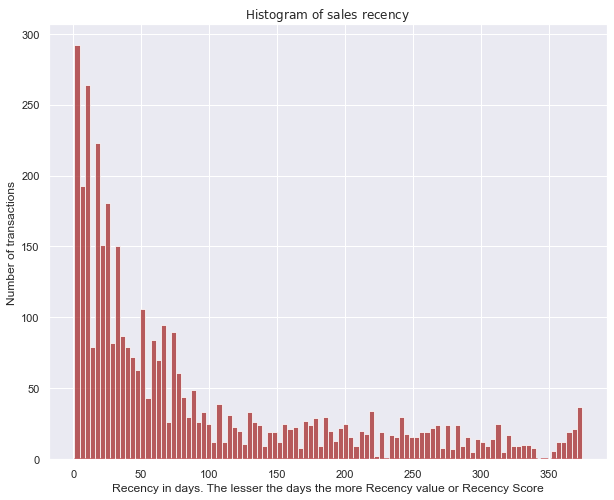

In [20]:
# Now let’s examine how the distribution of customer recency looks for our data
x = UKCSR.Recency
mu = np.mean(UKCSR.Recency)
sigma = math.sqrt(np.var(UKCSR.Recency))
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(x, 100, facecolor='brown', alpha=0.75)
# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Recency in days. The lesser the days the more Recency value or Recency Score')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ recency}\ $')
plt.grid(True)

The histogram shown above tells us:
> 1 That the distribution of sales recency is skewed to the right.

> 2 The higher the Recency in days it is really the longer the oldness of last purchase or sales

> 3 The lower the Recency in days it is really the more recent of last purchases or sales 

> 4 There are much higher number of frequent transactions for recent purchases about between 0 and 75 days than for purchases or sales from 80 to more than 350 days.

[Return to Content of Customer Segmentation by K-Means](#1)

### 4.4.2 Frequency
<a id='4.4.2'></a>

To calculate Frequency values, we can use the total number of unique `InvoiceNo` per `CustomerID`.</br> Then Frequency will be measured by the total numer of orders as each order is assumed to have a unique Invoice Number.</br> <span style='background:gold'>This is another difference between Sarkar et. al.,(2018) and Liu, k.(2022). It seems that Sarkar et. al.,(2018) have considered Frequency by the number of transactions or amounts instead of `InvoiceNo` </span>

We'll use the number of unique `[InvoiceNo].nunique()` per `UKCS.groupbt(CustomerID)` to calculate the frequency

`nunique()` Returns the number of unique elements in the object.

In [21]:
UKCSF = CSUK.groupby('CustomerID')['InvoiceNo'].nunique().to_frame().reset_index()
UKCSF.rename(columns={"InvoiceNo":"Frequency"},inplace=True)
UKCSF.head()

CustomerID  Frequency
0       12346          1
1       12747         11
2       12748        210
3       12749          5
4       12820          4

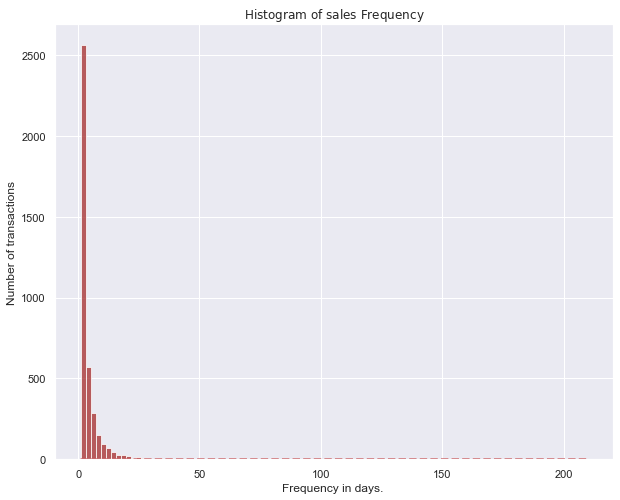

In [23]:
# Now let’s examine how the distribution of customer Frequency looks for our data
x = UKCSF.Frequency
mu = np.mean(UKCSF.Frequency)
sigma = math.sqrt(np.var(UKCSF.Frequency))
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(x, 100, facecolor='brown', alpha=0.75)
# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Frequency in days. ')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ Frequency}\ $')
plt.grid(True)

From above figure and simply put, the lesser sales or 'Frequency in dasy' correspond to a higher number of transactions(mainly purchases). Also the histogram is skeewed to the right and it can even be a fat tail histogram.

[Return to Content of Customer Segmentation by K-Means](#1)

### 4.4.3 Monetary
<a id='4.4.3'></a>

For Monetary values, we can use the total amount spent by each customer over the entire period:
We'll use the total amount spent by customers over the period to get the Monetary table

In [30]:
# gets the sum of `Amount` per each `CustomerID`
UKCSM = CSUK.groupby('CustomerID')['amount'].sum().to_frame().reset_index()
UKCSM.rename(columns={"amount":"Monetary"},inplace=True)
UKCSM.head()

CustomerID  Monetary
0       12346  77183.60
1       12747   4196.01
2       12748  33719.73
3       12749   4090.88
4       12820    942.34

In [31]:
UKCSM.describe()

CustomerID       Monetary
count   3921.000000    3921.000000
mean   15561.471563    1863.910113
std     1576.823683    7481.922217
min    12346.000000       0.000000
25%    14208.000000     300.040000
50%    15569.000000     651.820000
75%    16913.000000    1575.890000
max    18287.000000  259657.300000

In [33]:
UKCSM[UKCSM['Monetary'].eq(0)]

CustomerID  Monetary
314       13256       0.0

Now we only have 1 Monetary value equal to zero.

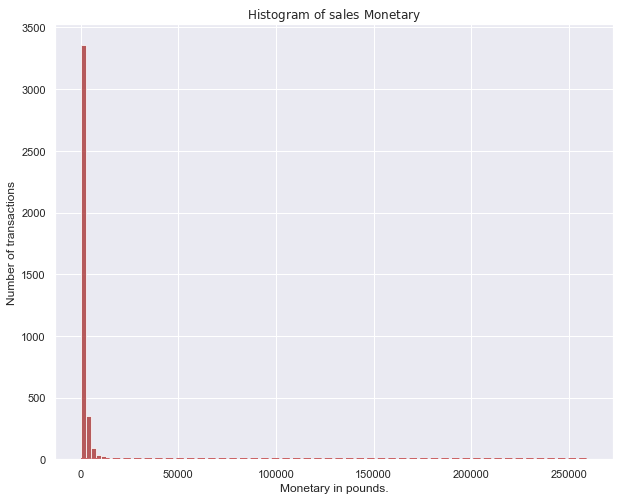

In [25]:
# Now let’s examine how the distribution of customer Frequency looks for our data
x = UKCSM.Monetary
mu = np.mean(UKCSM.Monetary)
sigma = math.sqrt(np.var(UKCSM.Monetary))
plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(x, 100, facecolor='brown', alpha=0.75)
# add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.xlabel('Monetary in pounds.')
plt.ylabel('Number of transactions')
plt.title(r'$\mathrm{Histogram\ of\ sales\ Monetary}\ $')
plt.grid(True)

The above figure tell us a predominant number of transactions between 3000 and 3500 for some Monetary.
That Monetary value could be the mean of it (1863.91 pounds).

In [26]:
UKCSM.Monetary.describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

Let's combine the three RFM values creating a single Dataframe.

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.5 Create dataframe of RFM
<a id='4.5'></a>
After getting all three R, F, and M values, we can combine them into one
DataFrame. There are different ways to achieve this. As an example, consider below:

In [121]:
# Creates CSUKRFM from UKCSR to get Recency, then it merges with UKCSF to get 'Frequency'
# the "outer': use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
CSUKRFM = UKCSR.merge(UKCSF, how="outer")
CSUKRFM.head()

CustomerID  Recency  Frequency
0       12346      326          1
1       12747        3         11
2       12748        1        210
3       12749        4          5
4       12820        4          4

In [122]:
# Updates CSUKRFM with UKCSM to get Amount 
CSUKRFM = CSUKRFM.merge(UKCSM, how="outer")
CSUKRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3         11   4196.01
2       12748        1        210  33719.73
3       12749        4          5   4090.88
4       12820        4          4    942.34

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.6 Save `CSUKRFM` to excel  
<a id='4.6'></a>

**CSUKRFM** has 4 features:

> CustomerID,

> Recency,

> Frequency,

> Monetary.

In [123]:
# we then could save the new DF. So we could continue our work from next step
CSUKRFM.to_excel("CSUKRFM.xlsx")

According to section  [*4.3 Steps for RFM Analysis*](#4.3) the next step (step 3) is to convert the respective R, F, and M values into scale scores.

[Return to Content of Customer Segmentation by K-Means](#1)

## 4.7 RFM Scores with 5 quantiles of equally sized groups
<a id='4.7'></a>

Now, let's assign scale scores. In order to do it, we can use quantiles, of which you can think of this as dividing the data into 5 equally sized groups.

In [34]:
# load the data 
CSUKRFM = pd.read_excel("CSUKRFM.xlsx",index_col=0)
CSUKRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3         11   4196.01
2       12748        1        210  33719.73
3       12749        4          5   4090.88
4       12820        4          4    942.34

In [35]:
CSUKRFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 153.2 KB


In [36]:
CSUKRFM.describe()

CustomerID      Recency    Frequency       Monetary
count   3921.000000  3921.000000  3921.000000    3921.000000
mean   15561.471563    92.722265     4.246111    1863.910113
std     1576.823683    99.528532     7.205750    7481.922217
min    12346.000000     1.000000     1.000000       0.000000
25%    14208.000000    18.000000     1.000000     300.040000
50%    15569.000000    51.000000     2.000000     651.820000
75%    16913.000000   143.000000     5.000000    1575.890000
max    18287.000000   374.000000   210.000000  259657.300000

To get an idea of the huge range of values each variable can take, we can get some descriptive statistics of its features.

In [36]:
print('Recency Min:',CSUKRFM.Recency.min(),
      'Recency Median:',CSUKRFM.Recency.median(),
      'Recency Max:',CSUKRFM.Recency.max());
print('Frequency Min:',CSUKRFM.Frequency.min(),'Frequency Max:',CSUKRFM.Frequency.max());
print('Monetary Min:',CSUKRFM.Monetary.min(),'Monetary Max:',CSUKRFM.Monetary.max())

Recency Min: 1 Recency Median: 51.0 Recency Max: 374
Frequency Min: 1 Frequency Max: 210
Monetary Min: 0.0 Monetary Max: 259657.3


The quantile function divides the data into equal halves, in which the median acts as middle and over that the remaining lower part is lower quartile and upper part is upper quartile.
https://www.digitalocean.com/community/tutorials/quantile-function-in-r

Lets get the quantiles for RFM  features. But first we should assing `CustomerID` as a new index.

In [45]:
CSUKRFM.set_index('CustomerID', inplace=True)

In [46]:
# Get 4 quantiles values
Quantiles = CSUKRFM.quantile(q=[0.2, 0.4, 0.6, 0.8])
Quantiles

Recency  Frequency  Monetary
0.2     13.0        1.0    241.62
0.4     33.0        2.0    465.55
0.6     72.0        3.0    897.62
0.8    179.0        6.0   1957.32

We now have five quantiles. [0,0.2],(0.2,0.4], (0.4,0.6], (0.6,0.8], (0.8,1]

Then for example the CustomerID with `Recency` values from 0 to 13 will be in quantile 0.2, for Recency > 13 & <=33 will be in quantile=0.4 and so for.

Later for example for the Recency it would be convenient to assing it the highest for example score=5 to the first quantile or q=0.2, for q=0.4 score=4, etc.

As shown above, the `quantile()` method has conveniently produced four quantile values for each metric in the columns.

Based on these values, we can convert the three R, F, M values into scale scores.

First, we need to define a function for R score conversion:

In [38]:
# First, we define a Rscore function to assign Recency scores

def Rscore(x, q, df):   # x=value, q=column, df=dataframe
    """
    gets the score values for Recency values.
    requires x: as Recency value, q:as quantile values 
    and df:as dataframe data
    """
    if x <= df[q][0.2]: # if x < first quantile value
        return 5        # return 5 as it is most recent.
    elif x <= df[q][0.4]:
        return 4
    elif x <= df[q][0.6]:
        return 3
    elif x <= df[q][0.8]:
        return 2
    else:
        return 1

<span style='background:cyan'>Note that since we will use `CSUKRFM` for other purpose later, we shall create a copy of the DataFrame and then apply the function to derive Rscore function to each feature.</br>

In [47]:
# create a copy of the dataframe to calculate the R score
CSUKRFM2 = CSUKRFM.copy()

In [48]:
# convert Recency to Rscore
# creates a new feature "Rscore" on `rfm_copy` dataframe
CSUKRFM2['Rscore'] = CSUKRFM2['Recency'].\
                        apply(Rscore, args=('Recency', Quantiles))
CSUKRFM2.head()

Recency  Frequency  Monetary  Rscore
CustomerID                                      
12346           326          1  77183.60       1
12747             3         11   4196.01       5
12748             1        210  33719.73       5
12749             4          5   4090.88       5
12820             4          4    942.34       5

From above output `CustomerID` = 12346 has a `Recency` score or `Rscore`=1, meaning that <span style='background:cyan'>the lowest the score for `Recency` the longest days of last purchase.</span>

Likewise, we can define a function for F and M scores conversion and call it to create Fscore and Mscore columns in the `CSUKRFM2` DataFrame.

In [49]:
# Likewise, we can define a function to assign FM scores for each customer

def FMscore (x, q, df):        
    if x <= df[q][0.2]:     
        return 1             
    elif x <= df[q][0.4]:
        return 2
    elif x <= df[q][0.6]:
        return 3
    elif x <= df[q][0.8]:
        return 4
    else:
        return 5

In [54]:
CSUKRFM2['Fscore'] = CSUKRFM2['Frequency'].\
                     apply(FMscore,args=('Frequency',Quantiles))
CSUKRFM2['Mscore'] = CSUKRFM2['Monetary'].\
                    apply(FMscore,args=('Monetary',Quantiles))
CSUKRFM2.head()

Recency  Frequency  Monetary  Rscore  Fscore  Mscore
CustomerID                                                      
12346           326          1  77183.60       1       1       5
12747             3         11   4196.01       5       5       5
12748             1        210  33719.73       5       5       5
12749             4          5   4090.88       5       4       5
12820             4          4    942.34       5       4       4

From the above ouput we notice that for example for CustomerID=12346 has the lowest scores for Recency and Frequency but the highest score for Monetary.

In [55]:
# we then could save the new DF `CSUKRFM2` in case we later need it.
CSUKRFM2.to_excel("CSUKRFM2.xlsx")

[Return to Content of Customer Segmentation by K-Means](#1)

### <span style='background:mediumaquamarine'>4.7.1 Plotting RFM features and RFM scores.</span>
<a id='4.7.1'></a>

If we try to plot these scores, we will get a weird picture as the feature values have very unequal ranges.

Load CSUKRFM and CSUKRFM2 if we started on this 4.7.1. phase.

> **CSUKRFM** has 4 features: CustomerID, 

>> **Recency**: Caculated  as the difference of days between `RefDate` minus and the "youngest" `InvoiceDate. 
x.max()` to get the most recent `InvoiceDate` value in days. Then it provides the number of days when a customer last made a purchase. 

>>**Frequency**: Calculated by the total numer of purchasing orders, considering each order by the unique `InvoiceNo`.

>>**Monetary**: Calculated as the total amount (or sum of `Monetary` which in turns is the `UnitPrice` multiplied by `Quantity`) spent by each customer over the entire period of the analysis.

> **CSUKRFM2** has CustomerID as index and 6 features: Recency, Frequency, Monetary, Rscore, Fscore, Mscore

>> Recency, Frequency, Monetary are simmillar as in CSUKRFM

>> Rscore, Fscore, Mscore are calculated by the `quantile()` method to divide into 5 equally sized values for each of their corresponding Recency, Frequency, Monetary values.

In [55]:
#CSUKRFM = pd.read_excel("CSUKRFM.xlsx",index_col=0)
CSUKRFM2 = pd.read_excel("CSUKRFM2.xlsx",index_col=0)

Text(0.5, 0, 'Monetary')

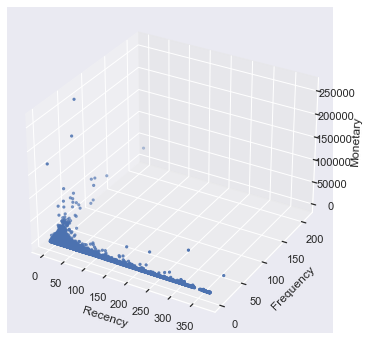

In [5]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM2.Recency
ys = CSUKRFM2.Frequency
zs = CSUKRFM2.Monetary
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

Nevertheless it is possible to notice that those customers with more recent purchase and less frequent purchases have the highest Monetary values. With this picture it would be very hard or very flat to assign clusters. 

Now if we try to plot the scores we will get an even more weird picture.

Text(0.5, 0, 'M score')

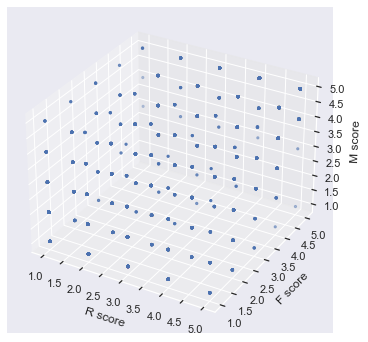

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM2.Rscore
ys = CSUKRFM2.Fscore
zs = CSUKRFM2.Mscore
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('R score')
ax.set_ylabel('F score')
ax.set_zlabel('M score')

From the above two figures we notice we need to rescale somehow the feature values or scores. That is someting we will do later on section [*5.1.1 Feature Scaling*](#5.1.1)

Nevertheless, I think is important to advance one reason for the need to rescale the feature values. For example, lets try to do a simple log rescaling in order to plot the RFM and RFM score values.

Create new log features values to try to plot with a rescaled feature values.

In [6]:
from sklearn import preprocessing
import math

CSUKRFM2['Recency_log'] = CSUKRFM2['Recency'].apply(math.log)
CSUKRFM2['Frequency_log'] = CSUKRFM2['Frequency'].apply(math.log)
CSUKRFM2['Monetary_log'] = CSUKRFM2['Monetary'].apply(math.log)

ValueError: math domain error

We got the "math domain error" due to there are either some negative or zero values.

In [8]:
CSUKRFM2.describe()

Recency    Frequency       Monetary       Rscore       Fscore  \
count  3921.000000  3921.000000    3921.000000  3921.000000  3921.000000   
mean     92.722265     4.246111    1863.910113     3.008416     2.628666   
std      99.528532     7.205750    7481.922217     1.415721     1.504020   
min       1.000000     1.000000       0.000000     1.000000     1.000000   
25%      18.000000     1.000000     300.040000     2.000000     1.000000   
50%      51.000000     2.000000     651.820000     3.000000     2.000000   
75%     143.000000     5.000000    1575.890000     4.000000     4.000000   
max     374.000000   210.000000  259657.300000     5.000000     5.000000   

            Mscore  Recency_log  Frequency_log  
count  3921.000000  3921.000000    3921.000000  
mean      2.999490     3.798472       0.945316  
std       1.414574     1.382276       0.900430  
min       1.000000     0.000000       0.000000  
25%       2.000000     2.890372       0.000000  
50%       3.000000     3.931826       0.693147  
75%       4.000000     4.962845       1.609438  
max       5.000000     5.924256       5.347108

We notice zero values for Monetary minimum then I was not possible to create Monetary_log feature.
Then what about if we try with the RFM scores?

In [11]:
# removes incomplete RFM_log features
CSUKRFM2.drop(columns=['Recency_log','Frequency_log'],inplace=True)

In [4]:
# creates new RFMscore_log features
# math.log() can only perform operations on a single value (scalar),
# but cannot perform calculations on multiple values ​​(scalars)
CSUKRFM2['Rscore_log'] = CSUKRFM2['Rscore'].apply(math.log)
CSUKRFM2['Fscore_log'] = CSUKRFM2['Fscore'].apply(math.log)
CSUKRFM2['Mscore_log'] = CSUKRFM2['Mscore'].apply(math.log)

As there were no zeros on any RFMscore features we werw able to apply the log transformation.
Lest take a look to the descriptive stats for them.

In [13]:
CSUKRFM2.describe()

Recency    Frequency       Monetary       Rscore       Fscore  \
count  3921.000000  3921.000000    3921.000000  3921.000000  3921.000000   
mean     92.722265     4.246111    1863.910113     3.008416     2.628666   
std      99.528532     7.205750    7481.922217     1.415721     1.504020   
min       1.000000     1.000000       0.000000     1.000000     1.000000   
25%      18.000000     1.000000     300.040000     2.000000     1.000000   
50%      51.000000     2.000000     651.820000     3.000000     2.000000   
75%     143.000000     5.000000    1575.890000     4.000000     4.000000   
max     374.000000   210.000000  259657.300000     5.000000     5.000000   

            Mscore   Rscore_log   Fscore_log   Mscore_log  
count  3921.000000  3921.000000  3921.000000  3921.000000  
mean      2.999490     0.960334     0.778670     0.957254  
std       1.414574     0.568899     0.634294     0.568623  
min       1.000000     0.000000     0.000000     0.000000  
25%       2.000000     0.693147     0.000000     0.693147  
50%       3.000000     1.098612     0.693147     1.098612  
75%       4.000000     1.386294     1.386294     1.386294  
max       5.000000     1.609438     1.609438     1.609438

Now lets continue to plot the RFMscore_log features

Text(0.5, 0, 'Z axis Mscore_log')

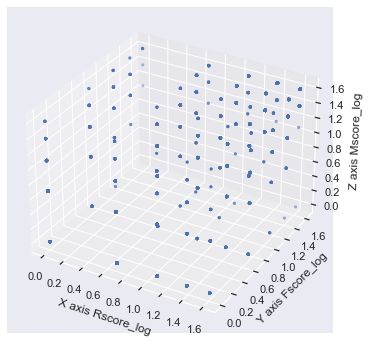

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs =CSUKRFM2.Rscore_log
ys = CSUKRFM2.Fscore_log
zs = CSUKRFM2.Mscore_log
ax.scatter(xs, ys, zs, s=5)

ax.set_xlabel('X axis Rscore_log')
ax.set_ylabel('Y axis Fscore_log')
ax.set_zlabel('Z axis Mscore_log')

Even though not very easy to interpret diagram, it seems to be a more concentration of points in the following features approximate ranges:

> Recency (0.4, 1.4)

> Frequency (1.4, 1.6)

> Monetary (0.2, 1.6)

This tells us that most customer purchases are between the above mentioned visual ranges. Nevertheless these plot diagram is not very helpful to interpret or propose a customer segmentation. So this is possibly one of the main reasons to use the K-Means unsupervised learning machine algorithm for a customer segmentation with RFM features.

Now even if we plot a 3D interactive diagram, we will not be able to visualy identify a possible customer segmentation. 
The 3D plot will on the task bar in a new window outside of jupyter lab.

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib qt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')

xs =CSUKRFM2.Rscore_log
ys = CSUKRFM2.Fscore_log
zs = CSUKRFM2.Mscore_log
ax.scatter3D(xs, ys, zs, s=5)

ax.set_xlabel('X axis Rscore_log')
ax.set_ylabel('Y axis Fscore_log')
ax.set_zlabel('Z axis Mscore_log')
plt.show()

<IPython.core.display.Javascript object>

AttributeError: 'DataFrame' object has no attribute 'Rscore_log'

[Return to Content of Customer Segmentation by K-Means](#1)

### 4.8 Another way to get the RFM scores by using qcut() method.
<a id='4.8'></a>

Alternatively, we can use pd.qcut() method to get the R, F, and M scores. 

The pandas documentation describes `qcut` as a “Quantile-based discretization function.” This basically means that `qcut` tries to divide up the underlying data into equal sized bins.

The function `qcut()` defines the bins **using percentiles based on the distribution of the data, not the actual numeric edges of the bins**. 

The previous way [*4.7 RFM Scores with 5 quantiles of equally sized groups*](#4.7) to get the RFM Scores used first 5 quantiles (with pandas `quantile()` method), then created two specific functions (`Rscore` and `FMscore`) to respectively create the scores for Recency, Frequency and Monetary based on its quantiles. The `quantile()` method by documented definition "return values at he given quantile over requeste axis". Then by the quantiles definition  and by the output of `Quantiles` variable previuosly created, these should be the "numeric edges of the bins" refered by Sarkar et. al. (2018).

So, in this section to get the RFM scores by pandas `qcut()` method, instead of `quantile()` it is used the `range()` function to get the ranges of each RFM feature and later it is used the `qcut()` in a straight way and also in a little more complex approach. Both ways to get the RFM scores have their trade-offs. The final results of both ways are very simmilar but not completely equal as it will shown at the end of this 4.8  section.

In [143]:
# creates 3 range objects 
# for r_range it creates a reverse range to be used in labelling below.
# this is due that the lesser the Recency value the higher the score
r_range = range(5, 0, -1) # creates 5 decrementing integers starting from 5 to 1
f_range = range(1, 6)
m_range = range(1, 6)

In [144]:
print("R range:",list(r_range),"\n"
      "F range:",list(f_range),"\n"
      "M range:",list(m_range))

R range: [5, 4, 3, 2, 1] 
F range: [1, 2, 3, 4, 5] 
M range: [1, 2, 3, 4, 5]


We create a copy of dataframe of the RFM values. i.e. `CSUKRFM`

In [145]:
# creates a copy of CSUKRFM
CSUKRFM3 = CSUKRFM.copy()
CSUKRFM3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 153.2 KB


In [146]:
CSUKRFM3.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3         11   4196.01
2       12748        1        210  33719.73
3       12749        4          5   4090.88
4       12820        4          4    942.34

In [147]:
# creates Rscore feature on CSUKRFM3
CSUKRFM3['RScore'] = pd.qcut(CSUKRFM3['Recency'],
                             q=5, labels=r_range)
CSUKRFM3.head()

CustomerID  Recency  Frequency  Monetary RScore
0       12346      326          1  77183.60      1
1       12747        3         11   4196.01      5
2       12748        1        210  33719.73      5
3       12749        4          5   4090.88      5
4       12820        4          4    942.34      5

For the 5 first rows of Rscore the values are equal to `CSUKRFM2`

In [10]:
# Lets creates Fscore feature on CSUKRFM3
CSUKRFM3['Fscore'] = pd.qcut(CSUKRFM3['FScore'],
                             q=5, labels=f_range)
CSUKRFM3.head()

KeyError: 'FScore'

We got an error because the parameter `labels=f_range`. As f_range values goes 1 to 5 and the first quantile will be 1, this creates a conflict. Then we can the rank() used a sort of aggregated method. Then Pandas Rank will compute the rank of your data point within a larger dataset as it is extremely useful for filtering the ‘first’ or 2nd of a sub dataset.

There are two core concepts to grasp with .rank():

> Rank order (ascending or not) and 

> method (how to rank data points with the same value).

In [148]:
# as the first quantile in Frequency is 1, which will conflict 
# with the label 1, we have to use a different method;
# otherwise, we will get error message;
# but we might have that identical values go into
# different quantiles due to pre-ranking.
CSUKRFM3['FScore'] = pd.qcut(CSUKRFM3['Frequency'].\
                                rank(method='first'),
                                q=5, labels=f_range)
CSUKRFM3.head()

CustomerID  Recency  Frequency  Monetary RScore FScore
0       12346      326          1  77183.60      1      1
1       12747        3         11   4196.01      5      5
2       12748        1        210  33719.73      5      5
3       12749        4          5   4090.88      5      4
4       12820        4          4    942.34      5      4

In [149]:
# for Monetary score we can calculate it as we did with RScore
CSUKRFM3['MScore'] = pd.qcut(CSUKRFM3['Monetary'],
                             q=5, labels=m_range)
CSUKRFM3.head()

CustomerID  Recency  Frequency  Monetary RScore FScore MScore
0       12346      326          1  77183.60      1      1      5
1       12747        3         11   4196.01      5      5      5
2       12748        1        210  33719.73      5      5      5
3       12749        4          5   4090.88      5      4      5
4       12820        4          4    942.34      5      4      4

Now, we might expect that the values for CSUKRFM3 and CSUKRFM2 should be the same.

In [150]:
CSUKRFM2.describe()

Recency    Frequency       Monetary       Rscore       Fscore  \
count  3921.000000  3921.000000    3921.000000  3921.000000  3921.000000   
mean     92.722265     4.246111    1863.910113     3.008416     2.628666   
std      99.528532     7.205750    7481.922217     1.415721     1.504020   
min       1.000000     1.000000       0.000000     1.000000     1.000000   
25%      18.000000     1.000000     300.040000     2.000000     1.000000   
50%      51.000000     2.000000     651.820000     3.000000     2.000000   
75%     143.000000     5.000000    1575.890000     4.000000     4.000000   
max     374.000000   210.000000  259657.300000     5.000000     5.000000   

            Mscore  
count  3921.000000  
mean      2.999490  
std       1.414574  
min       1.000000  
25%       2.000000  
50%       3.000000  
75%       4.000000  
max       5.000000

In [151]:
CSUKRFM3.describe()

CustomerID      Recency    Frequency       Monetary
count   3921.000000  3921.000000  3921.000000    3921.000000
mean   15561.471563    92.722265     4.246111    1863.910113
std     1576.823683    99.528532     7.205750    7481.922217
min    12346.000000     1.000000     1.000000       0.000000
25%    14208.000000    18.000000     1.000000     300.040000
50%    15569.000000    51.000000     2.000000     651.820000
75%    16913.000000   143.000000     5.000000    1575.890000
max    18287.000000   374.000000   210.000000  259657.300000

We notice that for CSUKRFM3 seems there are not describing statistics for the score features.
This is due that rank created category objects instead of integer values.

In [152]:
CSUKRFM3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  3921 non-null   int64   
 1   Recency     3921 non-null   int64   
 2   Frequency   3921 non-null   int64   
 3   Monetary    3921 non-null   float64 
 4   RScore      3921 non-null   category
 5   FScore      3921 non-null   category
 6   MScore      3921 non-null   category
dtypes: category(3), float64(1), int64(3)
memory usage: 165.0 KB


In [153]:
CSUKRFM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3921 non-null   int64  
 1   Frequency  3921 non-null   int64  
 2   Monetary   3921 non-null   float64
 3   Rscore     3921 non-null   int64  
 4   Fscore     3921 non-null   int64  
 5   Mscore     3921 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 214.4 KB


Then we would need to convert categorical values to numeric ones. <span style='background:gold'> This subtle detail of convertion was not mentioned by Liu, K. (2022).</span> A very simple way to achieve the conversion is as follows:

In [154]:
CSUKRFM3[['RScore','FScore','MScore']] = CSUKRFM3[['RScore','FScore','MScore']].round(0).astype('int64')

In [155]:
CSUKRFM3.head()

CustomerID  Recency  Frequency  Monetary  RScore  FScore  MScore
0       12346      326          1  77183.60       1       1       5
1       12747        3         11   4196.01       5       5       5
2       12748        1        210  33719.73       5       5       5
3       12749        4          5   4090.88       5       4       5
4       12820        4          4    942.34       5       4       4

In [156]:
CSUKRFM3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
 4   RScore      3921 non-null   int64  
 5   FScore      3921 non-null   int64  
 6   MScore      3921 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 245.1 KB


Then we can now get the descriptive stats for CSUKRFM3

In [157]:
CSUKRFM3.describe()

CustomerID      Recency    Frequency       Monetary       RScore  \
count   3921.000000  3921.000000  3921.000000    3921.000000  3921.000000   
mean   15561.471563    92.722265     4.246111    1863.910113     3.008416   
std     1576.823683    99.528532     7.205750    7481.922217     1.415721   
min    12346.000000     1.000000     1.000000       0.000000     1.000000   
25%    14208.000000    18.000000     1.000000     300.040000     2.000000   
50%    15569.000000    51.000000     2.000000     651.820000     3.000000   
75%    16913.000000   143.000000     5.000000    1575.890000     4.000000   
max    18287.000000   374.000000   210.000000  259657.300000     5.000000   

            FScore       MScore  
count  3921.000000  3921.000000  
mean      2.999490     2.999490  
std       1.414574     1.414574  
min       1.000000     1.000000  
25%       2.000000     2.000000  
50%       3.000000     3.000000  
75%       4.000000     4.000000  
max       5.000000     5.000000

Comparing the descriptive stats values for CSUKRFM2 and CSUKRFM3 we notice they are not the same (see FScore), but instead are very simmilar. Then we could save this dataframe in case we further need it.

In [158]:
# we save the new dataframe `CSUKRFM3` in case we later need it.
CSUKRFM3.to_excel("CSUKRFM3.xlsx")

[Return to Content of Customer Segmentation by K-Means](#1)

### 5 Modeling phase for Customer Segmentation
<a id='5'></a>

We have reached the fourth phase of the CRISP-DM process model.

The fourth phase in the CRISP-DM process is the core phase in the process where most of the analysis takes place with regard to using clean, formatted data and its attributes to build models to solve business problems. The CRISP-DM model and each of their phases are iterative process. So, the basic idea of the modeling phase is to build multiple models iteratively trying to get to the best model that satisfies our success criteria, data mining objectives, and business objectives. 

Some of the most common subprocess of the modeling phase are:
>Selecting Modeling Techniques. 
>> In this stage, we pick up a list of relevant Machine Learning and data mining tools, frameworks, techniques,
and algorithms listed in the “Business Understanding” phase. Techniques that are proven to be robust and useful in solving the problem are usually selected based on inputs and insights from data analysts and data scientists. These are mainly decided by the current data available, business goals, data mining goals, algorithm requirements, and constraints.

> Model Building
>> The process of model building is also known as **training the model** using data and features from our dataset.
A combination of data (features) and Machine Learning algorithms together give us a model that tries to generalize on the training data and give necessary results in the form of insights and/or predictions.

>> Generally various algorithms are used to try out multiple modeling approaches on the same data to solve the same problem to get the best model that performs and gives outputs that are the closest to the business success criteria. 

>> Key things to keep track here are the models created, model parameters being used, and their results.

> Model Evaluation and Tuning.
>>In this stage, we evaluate each model based on several metrics like model accuracy, precision, recall, F1 score, and so on. We also tune the model parameters based on techniques like grid search and cross validation to get to the model that gives us the best results. Tuned models are also matched with the data mining goals to see if we are able to get the desired results as well as performance. Model tuning is also termed as hyperparameter optimization in the Machine Learning world.

> Model Assessment
>> Once we have models that are providing desirable and relevant results, a detailed assessment of the model is
performed based on the following parameters.
>>> Model performance is in line with defined success criteria

>>> Reproducible and consistent results from models

>>> Scalability, robustness, and ease of deployment

>>> Future extensibility of the model

[Return to Content of Customer Segmentation by K-Means](#1)

#### 5.1 Model 1 segmenting by RFM total Score and by loyalty groups
<a id='5.1'></a>

This model is possibly the simplest one as it does not implement any ML algorithm. Nevertheless, this model could be used as complement to further more elaborated modeles. 

We then load all the libraries needed and previously created datframes.

In [1]:
#IMPORT MODULES
import pandas as pd
import numpy as np
import datetime as dt

# visualization
import matplotlib.pyplot as plt
#Numerical Python functions written for compatibility with MATLAB commands with the same names.
# Most numerical Python functions can be found in the NumPy and SciPy libraries. 
#What remains here (in mlab) is code for performing spectral computations
# and kernel density estimations.
import matplotlib.mlab as mlab
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()
import math
from scipy.stats import norm

# import created Customer Segmentation Kit of functions
import UL_KMeansCustSeg_RA as CSK
# autoreload extension neccesary whenever CSK updates
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
CSUKRFM = pd.read_excel("CSUKRFM.xlsx",index_col=0)
CSUKRFM2 = pd.read_excel("CSUKRFM2.xlsx",index_col=0)
CSUKRFM3 = pd.read_excel("CSUKRFM3.xlsx",index_col=0)

In [160]:
CSUKRFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 153.2 KB


In [161]:
CSUKRFM2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3921 non-null   int64  
 1   Frequency  3921 non-null   int64  
 2   Monetary   3921 non-null   float64
 3   Rscore     3921 non-null   int64  
 4   Fscore     3921 non-null   int64  
 5   Mscore     3921 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 214.4 KB


In [162]:
CSUKRFM3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
 4   RScore      3921 non-null   int64  
 5   FScore      3921 non-null   int64  
 6   MScore      3921 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 245.1 KB


For customer segmentation, we can use calculate the RFMScore by simply taking the average of the R, F, M scores derived above. Lets do this step by step for `CSUKRFM2` and later for `CSUKRFM3` just for comparisson reasons. Lets create a new DF for each.

In [132]:
# we use the average of R,F,and M scores for RFM score. Rounding to nearest integer
CSUKRFM4=CSUKRFM2.copy()
CSUKRFM4['RFMscore'] = CSUKRFM4[['Rscore', 'Fscore', 
                                 'Mscore']].mean(axis=1).round(0).astype('int64')

CSUKRFM4.head()

Recency  Frequency  Monetary  Rscore  Fscore  Mscore  RFMscore
CustomerID                                                                
12346           326          1  77183.60       1       1       5         2
12747             3         11   4196.01       5       5       5         5
12748             1        210  33719.73       5       5       5         5
12749             4          5   4090.88       5       4       5         5
12820             4          4    942.34       5       4       4         4

Now, depending on what values most to your business, you can segement customers into different groups, for example:

- Frequent buyers
- Big spenders
- Plantium customers
- Gold customers, etc.

In [133]:
# we could take a look to RFM descriptive statistics
CSUKRFM4.RFMscore.describe()

count    3921.000000
mean        2.876817
std         1.292394
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: RFMscore, dtype: float64

Finally, based on the RFM score we can segment customers into different groups. As an example, we arbitrarily divide them into **Five groups** by defining the following function:

In [134]:
# we define a function to segement customers

def segment(df):
    if df.RFMscore <= 1:
        return 'Bronze'
    elif df.RFMscore <= 2:
        return 'Silver'
    elif df.RFMscore <= 3:
        return 'Gold'
    elif df.RFMscore <= 4:
        return 'Platinum'
    else:
        return 'Diamond'

In [135]:
CSUKRFM4['LoyaltyGroup'] = CSUKRFM4.apply(segment, axis=1)
CSUKRFM4.head(n=10)

Recency  Frequency  Monetary  Rscore  Fscore  Mscore  RFMscore  \
CustomerID                                                                   
12346           326          1  77183.60       1       1       5         2   
12747             3         11   4196.01       5       5       5         5   
12748             1        210  33719.73       5       5       5         5   
12749             4          5   4090.88       5       4       5         5   
12820             4          4    942.34       5       4       4         4   
12821           215          1     92.72       1       1       1         1   
12822            71          2    948.88       3       2       4         3   
12823            75          5   1759.50       2       4       4         3   
12824            60          1    397.12       3       1       2         2   
12826             3          7   1474.72       5       5       4         5   

           LoyaltyGroup  
CustomerID               
12346            Silver  
12747           Diamond  
12748           Diamond  
12749           Diamond  
12820          Platinum  
12821            Bronze  
12822              Gold  
12823              Gold  
12824            Silver  
12826           Diamond

Let's have a look at how many customers in each group:

In [136]:
CSUKRFM4 = CSUKRFM4.reset_index()
CSUKRFM4.groupby('LoyaltyGroup')['CustomerID'].\
                 count().sort_values(ascending=False)

LoyaltyGroup
Silver      1074
Gold         857
Platinum     809
Bronze       645
Diamond      536
Name: CustomerID, dtype: int64

In [137]:
CSUKRFM4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    3921 non-null   int64  
 1   Recency       3921 non-null   int64  
 2   Frequency     3921 non-null   int64  
 3   Monetary      3921 non-null   float64
 4   Rscore        3921 non-null   int64  
 5   Fscore        3921 non-null   int64  
 6   Mscore        3921 non-null   int64  
 7   RFMscore      3921 non-null   int64  
 8   LoyaltyGroup  3921 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 275.8+ KB


It will be useful to plot this LoyaltyGroup ordered by the order of loyalty (least to most). So we can later compare this result with the clusters obtained from K-Means.

Text(0.5, 1.0, 'Customers Loyalties groups by RFMscore')

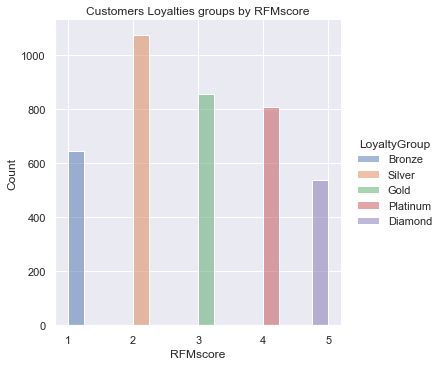

In [139]:
# then we plot ordering the columns by its loyaltyGroup importance which are the RFMscores
sns.displot(data=CSUKRFM4, x='RFMscore', kind='hist', hue='LoyaltyGroup',
           hue_order=['Bronze','Silver','Gold','Platinum','Diamond'])
plt.title('Customers Loyalties groups by RFMscore')

We could interpret that the customer loyalty is not bad at all, as the least LoyaltyGroup score (Bronze) is just barely above the most Loyalty group (Diamond). Also the remaining LoyaltyGroup have fair RFMscores

We can now get this groupa for the other DF CSUKRFM6

In [163]:
# we use the average of R,F,and M scores for RFM score. Rounding to nearest integer
CSUKRFM6=CSUKRFM3.copy()
CSUKRFM6['RFMscore'] = CSUKRFM6[['RScore', 'FScore', 
                                 'MScore']].mean(axis=1).round(0).astype('int64')
CSUKRFM6['LoyaltyGroup'] = CSUKRFM6.apply(segment, axis=1)
CSUKRFM6.groupby('LoyaltyGroup')['CustomerID'].\
                 count().sort_values(ascending=False)

LoyaltyGroup
Silver      1042
Gold         945
Platinum     859
Diamond      583
Bronze       492
Name: CustomerID, dtype: int64

Text(0.5, 1.0, 'Customers Loyalties groups by RFMscore of CSUKRFM6')

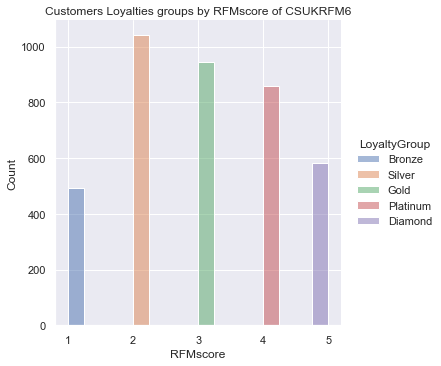

In [164]:
# then we plot ordering the columns by its loyaltyGroup importance which are the RFMscores
sns.displot(data=CSUKRFM6, x='RFMscore', kind='hist', hue='LoyaltyGroup',
           hue_order=['Bronze','Silver','Gold','Platinum','Diamond'])
plt.title('Customers Loyalties groups by RFMscore of CSUKRFM6')

The RFMscore and loyalties for CSUKRFM6 look even better than for CSUKRFM4. But at this point we can not tell which one is the most appropiate or correct. Surely in the subphase of Model Evaluation and Tuning we can have more certaintty of wich model is better than others, specially when using the clustering K-Means algorithm.

Once a business has segmented its customers, it can then develop specific strategies to target each segment for creating better customer service and experience. For
example, using promotions, offers, or discounts to retrain ‘shop switchers’, while
providing superior customer experience to make loyal customers feel more valued.

However, it is important to realize that, while RFM analysis can help effectively
segment customers into various tiers and create a quick snapshot of customers who
are most valuable to your business, it does not necessarily mean that the segmentation can accurately reflect what the customers desire and the true motivations behind their behaviours.

Whilst you can develop tailored engagement campaigns, marketing advertisements, prioritized nurturing, and loyalty programmes for each customer segment, they may not want to hear from you for all those kinds of efforts all the time.

Therefore, make sure you have a clever communication strategy in place and **do not overwhelm your customers with excessive emails and calls to promote your products**, which would certainly annoy them and eventually turn them away.

Remember that **a high RFM score may be a sign to further analyse those valuable customers and find their true motives behind their behaviours, rather than to try to
push more products to them right away**.

[Return to Content of Customer Segmentation by K-Means](#1)

### 5.2 K-Means Clustering Algorithm for customer segmentation
<a id='5.2'></a>

The **K-means clustering algorithm** (Kmca for short) for finding out clusters (or segments in our data), it is one of the simplest clustering algorithms that we can employ and hence it is widely used in practice. 

However, **KMeans assumes symmetric distribution**, i.e. one of the requirements for proper functioning of the algorithm is **the mean centering of the variable values**. 

**Mean centering of a variable value** means that we will replace the actual value of the variable with a **standardized value**. This ensures that all the variables are in the same range and the difference in ranges of values doesn’t cause the algorithm to not perform well. This is akin to **feature scaling**.

We saw in sections 4.4.1, 4.4.2 and 4.4.3 that features values are right skeewed. Nevertheless, it is convenient to **refresh the RFM histograms** to assure wheter or not we have a symmetric distribution of the feature values. 

As the RFM histograms have not symmetric distributions their values will be rescaled by applying to them neperian logarithms to normalize them.

In [4]:
import pandas as pd
CSUKRFM = pd.read_excel("CSUKRFM.xlsx",index_col=0)

In [5]:
CSUKRFM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3921 non-null   int64  
 1   Recency     3921 non-null   int64  
 2   Frequency   3921 non-null   int64  
 3   Monetary    3921 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 153.2 KB


In [6]:
CSUKRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3         11   4196.01
2       12748        1        210  33719.73
3       12749        4          5   4090.88
4       12820        4          4    942.34

In [7]:
CSUKRFM.describe()

CustomerID      Recency    Frequency       Monetary
count   3921.000000  3921.000000  3921.000000    3921.000000
mean   15561.471563    92.722265     4.246111    1863.910113
std     1576.823683    99.528532     7.205750    7481.922217
min    12346.000000     1.000000     1.000000       0.000000
25%    14208.000000    18.000000     1.000000     300.040000
50%    15569.000000    51.000000     2.000000     651.820000
75%    16913.000000   143.000000     5.000000    1575.890000
max    18287.000000   374.000000   210.000000  259657.300000

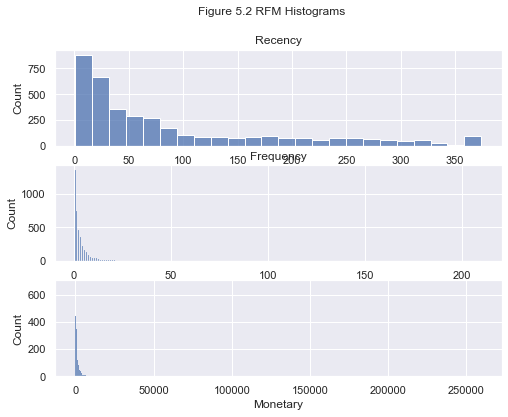

In [43]:
# plots the histograms for each feature, so we notice if they are normal distributions
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.2 RFM Histograms")
sns.histplot(CSUKRFM['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(CSUKRFM['Frequency'], ax=axs[1])
axs[1].set_title("Frequency")
sns.histplot(CSUKRFM['Monetary'], ax=axs[2]);

From the above figures, we can see that the three features  are right-skewed. So we need to tranform the data before feeding them into the model.

[Return to Content of Customer Segmentation by K-Means](#1)

### 5.2.1 Feature scaling Concepts
<a id='5.2.1'></a>

Up to this point, we are well aware that the Recency and Frequency values are in the hundreds or 3rd order of magnitude range, while the monetary values are in the 5th order of magnitude. So we need somehow to rescale those feature values to a more standard  magnitude range.

The following paragraphs taken from (Gupta & Sehgal, 2021) provides proper context about scales:

When data has attributes with varying scales, it may be helpful to **rescale**. Many machine learning algorithms can benefit from **rescaling the attributes to all have the same scale**.

**Feature scaling** is an important step in the data transformation stage of the data preparation process. Feature scaling is the method to limit the range of variables so that they can be compared on common grounds. **Feature scaling is a method for standardization** of independent features. It means to adjust values of numeric features measured on different scales to **a notionally common scale, without altering differences in the value’s ranges or losing information**.

The goal is to improve the overall quality of the dataset by re-scaling the dimension of the data and avoiding situations in which some values over-weighting others.

The two most popular techniques of Feature Scaling are (Gupta & Sehgal, 2021):
1. Standardization
2. Normalization

**Standardizing**, a dataset involves rescaling the distribution of values so that the **mean** of observed values is **0** and the **standard deviation is 1**.  This can be thought of as subtracting the mean or **centering the data**.

**Standardization** assumes that observations fit a **Gaussian** distribution (bell curve) with a well-behaved mean and standard deviation. It requires that we know or are able to accurately estimate the mean and standard deviation of observable values.

One may be able to estimate these values from training data, not the entire dataset
(Gupta & Sehgal, 2021).

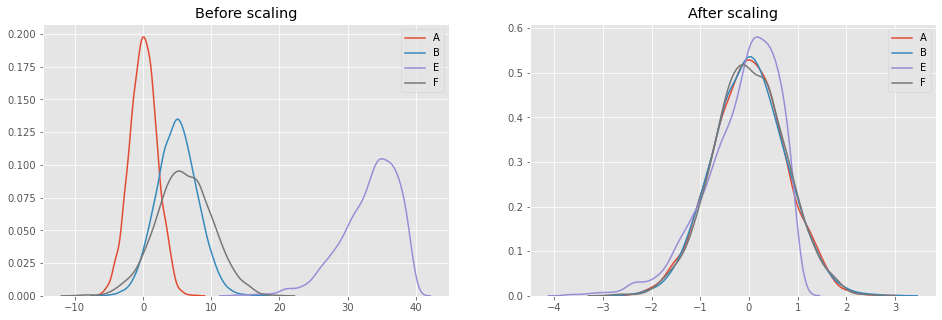
source:https://towardsdatascience.com/preprocessing-data-feature-scaling-cc28c508e8af

**Normalization (Min–Max Normalization)**
Normalization refers to rescaling the feature between min and max (usually between 0 and 1). To normalize the feature, subtract the min value from each feature instance and divide by the range of the feature (max–min) (Gupta & Sehgal, 2021).

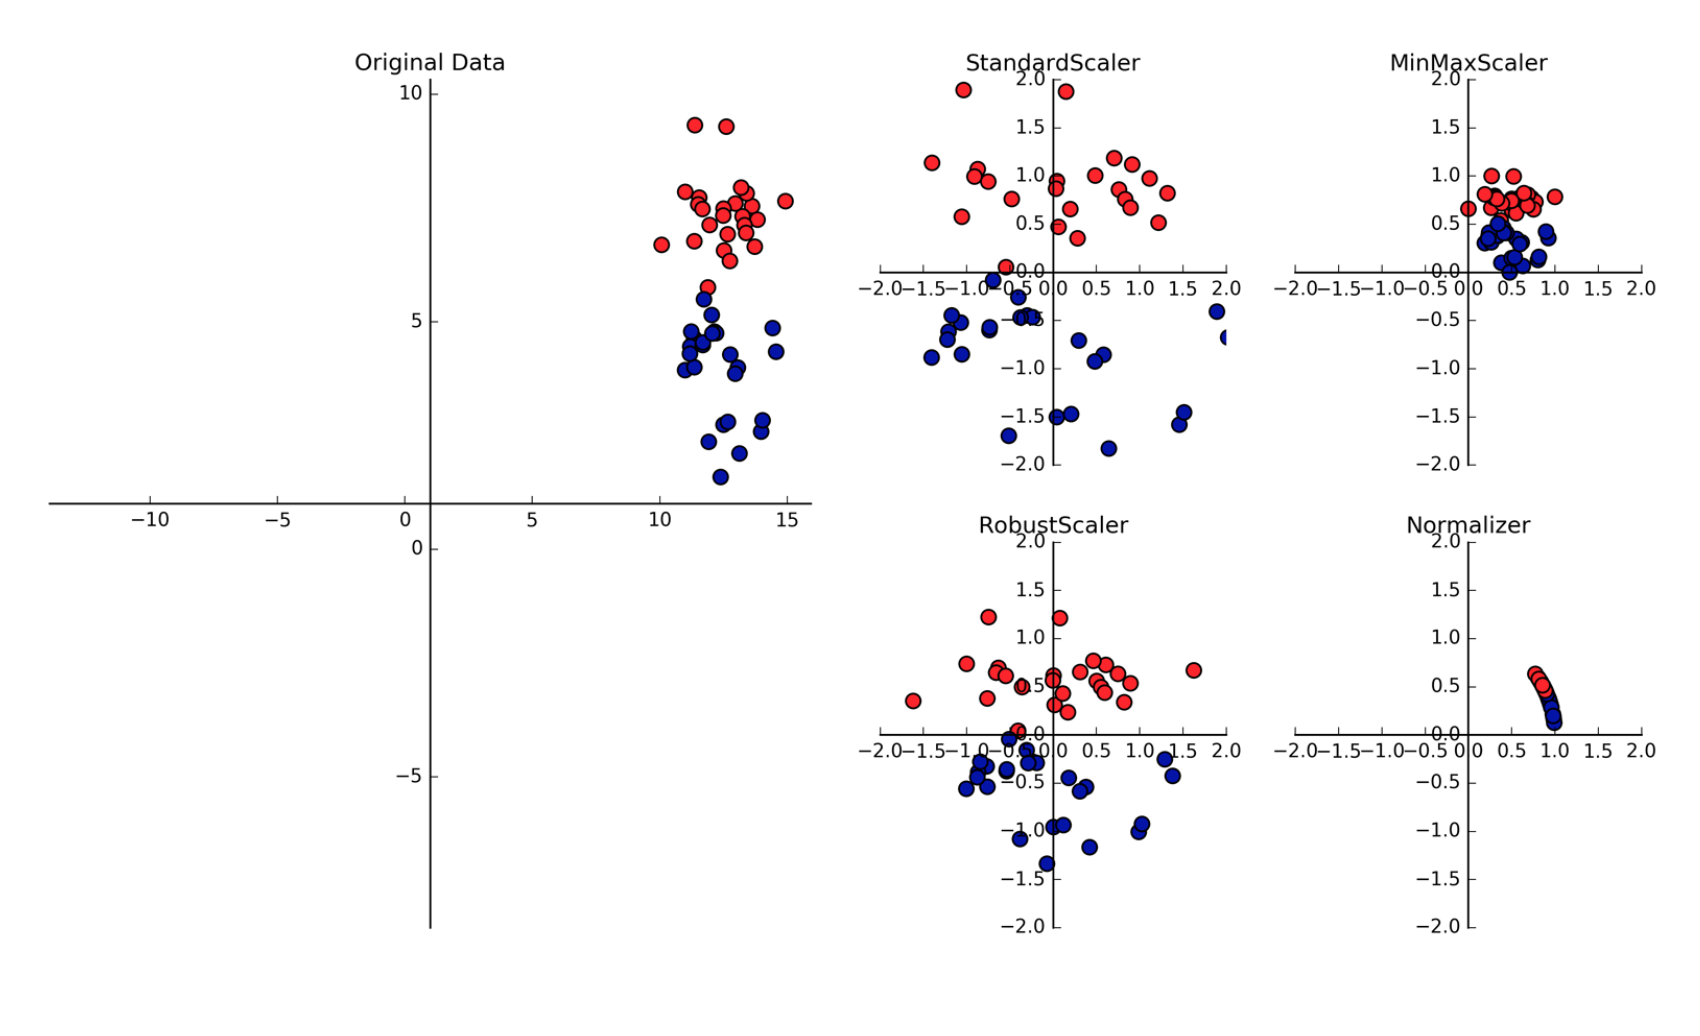

**Normalization** is another important concept needed to change all features to the same scale. This allows for **faster convergence on learning, and more uniform influence for all weights**.

**Tree-based models** are not dependent on scaling, but non-tree models models, very often are hugely dependent on it.

Outliers can affect certain scalers, and it is important to either remove them or choose a scalar that is robust towards them.

Fuente: https://python-data-science.readthedocs.io/en/latest/normalisation.html

[Return to Content of Customer Segmentation by K-Means](#1)

#### 5.2.2 log transformation as sort of Normalization (rescaling to ln values)
<a id='5.2.2'></a>

the "log" used here refers to natural o neperian logarithm of base=e or 2.72 aprox. As the ln(0) is not defined. Trying to calculate ln(0) should result in an error message or (inf).

The Log Transform is one of the most popular Transformation techniques out there. It is primarily used **to convert a skewed distribution to a normal distribution/less-skewed distribution**.
source:https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/#:~:text=The%20Log%20Transform%20is%20one,values%20as%20the%20column%20instead.&text=log(10000)%20%3D%204.

The "log transformation" is s done when the variables span several orders of magnitude. Income is a typical example: its distribution is "power law", meaning that the vast majority of incomes are small and very few are big.

This type of "fat tailed" distribution is studied in logarithmic scale because of the mathematical properties of the logarithm ... helps Making the values comparable.
Source: https://datascience.stackexchange.com/questions/40089/what-is-the-reason-behind-taking-log-transformation-of-few-continuous-variables

"Recency" for example seem to be a "fat tailed" distribution.

It is quite often to use the log transformation on your data, if your data are always positive (e.g. the price of something) and their scales varies drastically.

A simple criterion of whether you should use log transformation is whether you want to use a linear or log scale for your x-axis when you are plotting the histogram of your data.
source: https://stats.stackexchange.com/questions/302168/log-transformation-instead-of-z-score-normalizatrion-for-machine-learning

In [1]:
import pandas as pd
CSUKRFM = pd.read_excel('CSUKRFM.xlsx',index_col=0)
CSUKRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12747        3         11   4196.01
2       12748        1        210  33719.73
3       12749        4          5   4090.88
4       12820        4          4    942.34

In [34]:
# create a new DF `CSUKRFM_ln` for neperian log values of RFM
CSUKRFM_ln = CSUKRFM.copy()
CSUKRFM_ln.set_index('CustomerID', inplace=True)
CSUKRFM_ln.head()

Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12747             3         11   4196.01
12748             1        210  33719.73
12749             4          5   4090.88
12820             4          4    942.34

In [5]:
CSUKRFM_ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    3921 non-null   int64  
 1   Frequency  3921 non-null   int64  
 2   Monetary   3921 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.5 KB


In [6]:
CSUKRFM_ln.describe()

Recency    Frequency       Monetary
count  3921.000000  3921.000000    3921.000000
mean     92.722265     4.246111    1863.910113
std      99.528532     7.205750    7481.922217
min       1.000000     1.000000       0.000000
25%      18.000000     1.000000     300.040000
50%      51.000000     2.000000     651.820000
75%     143.000000     5.000000    1575.890000
max     374.000000   210.000000  259657.300000

From above we notice min zero value for `Monetary`. Then as said before in the begining of this section, if we try to calculate the ln(0) will get an error. Then lets review some more logarithm concepts to look for a solution.

The log operation has a dual role or purpouse:
1. Reducing the impact of too-low values
2. Reducing the impact of too-high values.

A small caveat though – **if our data has negative values or values ranging from 0 to 1, we cannot apply log transform directly**– since the log of negative numbers and numbers between 0 and 1 is undefined, we would get error or NaN values in our data.<br> In such cases, we can add a number to these values to make them all greater than 1. Then, we can apply the log transform.

In [7]:
# we can add 1 to the value manually or use np.log1p()
# np.log1p(): Returns the natural logarithm of one plus the input array, element-wise.
# math.log() can only perform operations on a single value (scalar),
# but cannot perform calculations on multiple values ​​(scalars) as numpy can calculate 
# on multiple values as in this case as it does for a whole dataframe.
CSUKRFM_ln = np.log1p(CSUKRFM_ln)
CSUKRFM_ln.describe()

Recency    Frequency     Monetary
count  3921.000000  3921.000000  3921.000000
mean      3.854531     1.346227     6.544492
std       1.306222     0.682309     1.247889
min       0.693147     0.693147     0.000000
25%       2.944439     0.693147     5.707243
50%       3.951244     1.098612     6.481301
75%       4.969813     1.791759     7.363210
max       5.926926     5.351858    12.467122

In [8]:
CSUKRFM_ln.to_excel("CSUKRFM_ln.xlsx")

We got no errors. Comparing the two `CSUKRFM_ln.describe()` outputs we notice the differences on their descriptive statistics. The min `Monetary=0` is due to ln(1)=0. We also notice that for `Recency` and `Frequency` their min and max values are very simmilar, while for `Monetary` max value is about the double of Recency or Frequency.

Loads the above saved file in case we like to assure about the correct file format and if we have restarted from this point of the use case.

In [9]:
CSUKRFM_ln = pd.read_excel('CSUKRFM_ln.xlsx',index_col=0)
CSUKRFM_ln.head()

Recency  Frequency   Monetary
CustomerID                                
12346       5.789960   0.693147  11.253955
12747       1.386294   2.484907   8.342128
12748       0.693147   5.351858  10.425868
12749       1.609438   1.791759   8.316760
12820       1.609438   1.609438   6.849427

In [10]:
CSUKRFM_ln.describe()

Recency    Frequency     Monetary
count  3921.000000  3921.000000  3921.000000
mean      3.854531     1.346227     6.544492
std       1.306222     0.682309     1.247889
min       0.693147     0.693147     0.000000
25%       2.944439     0.693147     5.707243
50%       3.951244     1.098612     6.481301
75%       4.969813     1.791759     7.363210
max       5.926926     5.351858    12.467122

For Recency and Frequency their rescaled min. values are the same (0.693147) and their respective max values are aprox.(5.93,5.35). For Monetary its min=0, max=12.47 aprox.

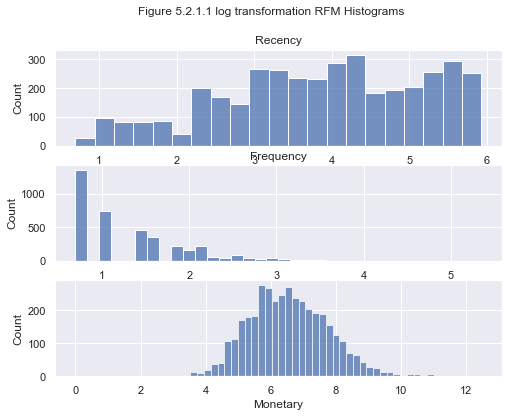

In [9]:
# plots again the histograms for each feature,
# so we notice if they are somehow normalized so RFM features
# can be easily compared
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.2.1.1 log transformation RFM Histograms")
sns.histplot(CSUKRFM_ln['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(CSUKRFM_ln['Frequency'], ax=axs[1])
axs[1].set_title("Frequency")
sns.histplot(CSUKRFM_ln['Monetary'], ax=axs[2]);

Comparing the above figure 5.2.1.1 with figure 5.2, we now notice a more compact scale, lets say from 0-12. Then we now have a more easy values comparability.

Log transforms are useful when applied to skewed distributions as they tend to expand the values which fall in the range of lower magnitudes and tend to compress or reduce the values which fall in the range of higher magnitudes. This tends to make the skewed distribution as normal-like as possible (Sarkar, Bali, & Sharma, 2018). 

<span style='background:turquoise'> This log transformation could be enough for normalization of feature scaling.</span> Nevertheles Liu, K.(2022) also performed **Standardization with StandardScaler()**, maybe with a first intention to reduce the skewness of `Recency` and `Frequency`. <span style='background:gold'> However, this Standardization with StandardScaler() have the additional benefit of better interpretability of `Recency` as the new scale of negative numbers indeed refer to less recent time from last purchase while positive numbers are for more recent time.</span>

It is also important to keep in mind the following:

Normalization is:
> highly affected by outliers.

> considered when the algorithms do not make assumptions about the data distribution.

Standardization is:
> slightly affected by outliers.

> used when algorithms make assumptions about the data distribution.

Could be interesting visualizing the clusters with the k-means algorithm applied to the CSUKRFM_ln

#### 5.2.3 Applying K-Means and visualizing clusters to RFM rescaled ln values (CSUKRFM_ln)
<a id='5.2.3'></a>

In section [*4.7.1 Plotting RFM features and RFM scores*](#4.7.1) we plotted the RFM features and its scores.<span style='background:burlywood'> We got weird plots mainly because we got the natural logarithm for the RFM score values instead of the RFM features.</span>

Now once we have properly rescaled the RFM values we could get a bit more intelligebly plots.

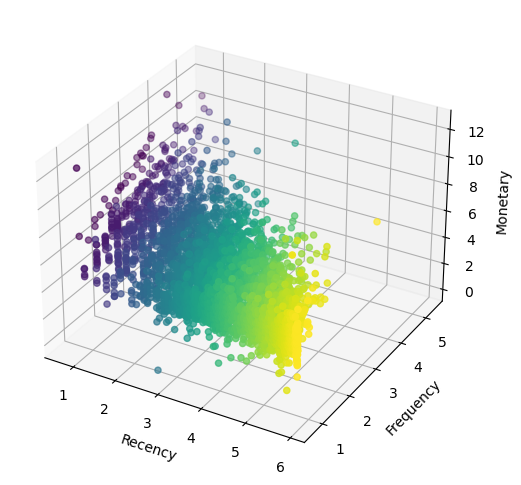

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln.Recency
ys = CSUKRFM_ln.Frequency,
zs = CSUKRFM_ln.Monetary
ax.scatter(xs, ys, zs, c=xs)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary');

We could even get an interactive plot so we can identify with more clearly those points with higher RFM values.

In [30]:
# The following 3d interactive plot will be displayed in another tab window
# and it can be manipulated with the mouse
# magic command matplotlib notebook needs to be 
# int the first line of the cell and  
# necessary in conjunction with WebAgg backend
%matplotlib notebook


# Select the backend 'WebAgg' used for rendering
# and GUI integration.
import matplotlib as mpl
mpl.use('WebAgg')
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln.Recency
ys = CSUKRFM_ln.Frequency,
zs = CSUKRFM_ln.Monetary
ax.scatter(xs, ys, zs, c=xs)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title("RFM Naperian log scaling of UK retail sales")
plt.show()

If you were able to plot and interact it with the mouse (static plots are shown below to ilustrate), you will notice that **purple dots are for about those customers with higher `Recency` and `Monetary` values independently of their `Frequency` values.**

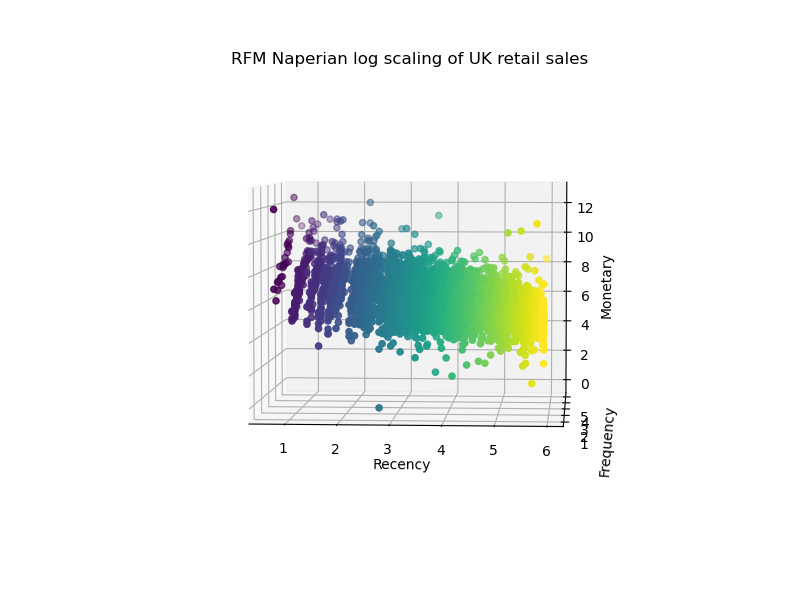

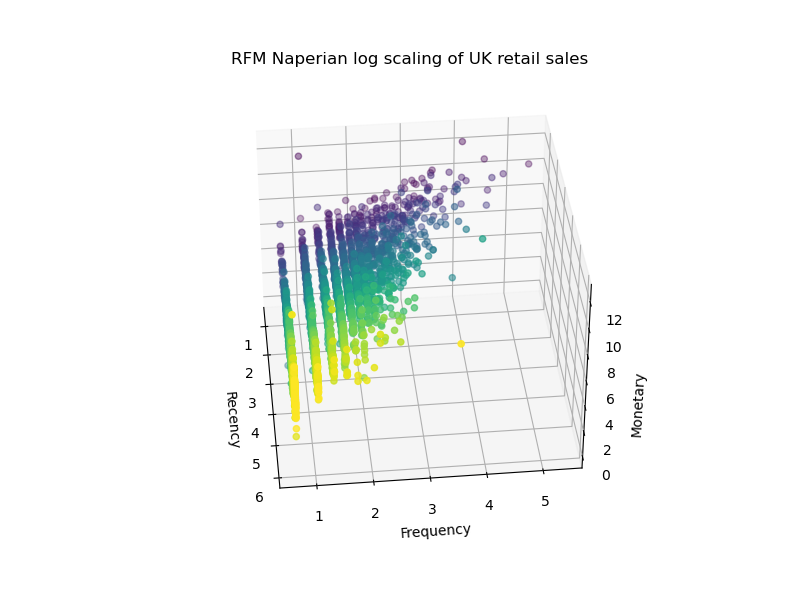

Also from the above graphs, we can mainly identify 3 clusters by its colors yellow, green and purple. However, we can not be quite sure if 3 clusters would be a corect choice, nor how to evaluate this possible decision. 

These are some of the reasons for taking advantage of the K-Means clustering algorithm for finding out clusters or segments in our data.

The K-means belongs to the partition based\centroid based clustering family of algorithms. The steps that happen in the K-means algorithm for partitioning the data are as given follows:
> 1. The algorithm starts with random point initializations of the required number of centers. The “K” in K-means stands for the number of clusters.

> 2. In the next step, each of the data point is assigned to the center closest to it. The distance metric used in K-means clustering is normal Euclidian distance.

> 3. Once the data points are assigned, the centers are recalculated by averaging the dimensions of the points belonging to the cluster.

> 4. The process is repeated with new centers until we reach a point where the assignments become stable. In this case, the algorithm terminates.

Then with KMeans we will get 5 clusters and plot them. The `cluster_label` variable will be a numpy array containing the label numbers of the cluster to which belong each RFM costomer point i.e. [0,1,2,3,4]

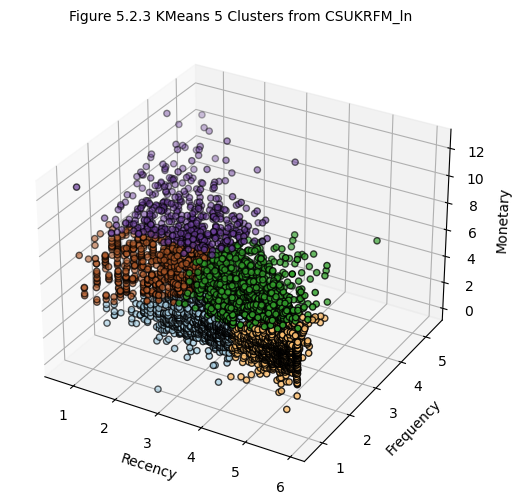

In [45]:
#let's create 5 clusters as it was done in section
# 5.1 "Model 1 segmenting by RFM..."
import matplotlib.pyplot as plt
# import kmeans estimator
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42) 
clusters = kmeans.fit_predict(CSUKRFM_ln)
cluster_center = kmeans.cluster_centers_
# cluster_label numpy array of cluster number [0,1,2,3,4]
cluster_label = kmeans.labels_


#3D scatter plot with 5 clusters
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline

fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig) # is deprecated
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln.Recency
ys = CSUKRFM_ln.Frequency,
zs = CSUKRFM_ln.Monetary

ax.scatter(xs, ys, zs, c=cluster_label,
          edgecolor='k', cmap='Paired')


ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Figure 5.2.3 KMeans 5 Clusters from CSUKRFM_ln', fontsize=10);

From the above figure 5.2.3. due to its source dataframe <span style='background:aqua'> the more Recently buyers are those with lesser the number on the scale</span>. 

So refering to plots of section [*5.1 Model 1 segmenting by RFM total Score and by loyalty groups*](#5.1) the possible matches are:
>purple cluster could correspond to the "Diamond" LoyaltyGroup

>red cluster could correspond to the "Platinum" LoyaltyGroup

>green cluster could correspond to the "Gold" LoyaltyGroup

>tan cluster would correspond to the "Silver" LoyaltyGroup

>blue cluster would correspond to the "Bronze" LoyaltyGroup


The "Diamond" LoyaltyGroup has the highest RFM scores. So the customers beloning to this group have the greater Rencency (near to 1), the greater Frequency (max value=5) and the greater Monetary values (max value=12). Another view of these clusters and possible matching groups is provided with the following animated 3d plot. 

The following is an animated 3d graph of the resulting KMeans 5 Clusters from CSUKRFM_ln which contains the RFM naperian log scaled values of the UK online retail sales. The animation will be shown into the same jupyterlab cell.

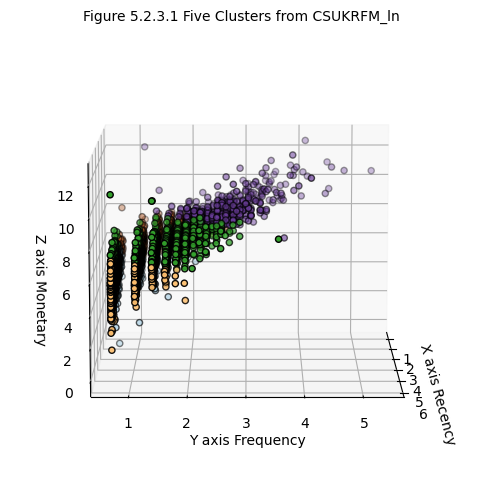

In [47]:
#let's create an animation of 5 clusters 
# 5 clusters as it was done in section 5.1 "Model 1 segmenting by RFM..."

# creating 3d plot using matplotlib in python
# for the animation it is required the installation of "FFmpeg" library

# importing required libraries
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln.Recency
ys = CSUKRFM_ln.Frequency
zs = CSUKRFM_ln.Monetary

ax.scatter3D(xs, ys, zs, c=cluster_label, 
           edgecolor='k', cmap='Paired')

ax.set_xlabel('X axis Recency')
ax.set_ylabel('Y axis Frequency')
ax.set_zlabel('Z axis Monetary')
ax.set_title('Figure 5.2.3.1 Five Clusters from CSUKRFM_ln', fontsize=10)

def animate(frame):
  ax.view_init(10, frame/3)
  plt.pause(.001)
  return fig


anim = animation.FuncAnimation(fig, animate, frames=300, interval=50)
HTML(anim.to_html5_video())

From above graphs we notice :
> The least `Frequency` values the least Monetary values.

> The more `Recency` values (1 to 3 aprox.) the higher `Monetary`

One last graph for this section could be also very useful as we can interact with it.

In [ ]:
# The following 3d interactive plot will be displayed in another tab window
# and it can be manipulated with the mouse
# magic command matplotlib notebook needs to be 
# int the first line of the cell and  
# necessary in conjunction with WebAgg backend
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
#Select the backend used for rendering and GUI integration.
# WebAgg works ok
mpl.use('WebAgg')

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln.Recency
ys = CSUKRFM_ln.Frequency
zs = CSUKRFM_ln.Monetary

ax.scatter(xs, ys, zs, c=cluster_label, 
           edgecolor='k', cmap='Paired')

ax.set_xlabel('X axis CSUKRFM_ln.Recency')
ax.set_ylabel('Y axis CSUKRFM_ln.Frequency')
ax.set_zlabel('Z axis CSUKRFM_ln.Monetary')
ax.set_title('Fig. 5.2.3.3 KMeans Clusters of RFM naperian log scaled UK online retail sales',
             fontsize=10)
plt.show()

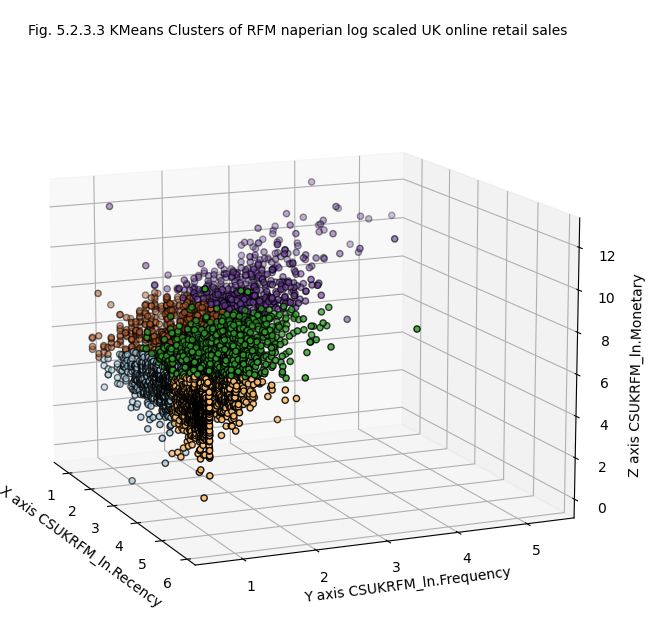

From above 5.2.3.3 graph, in general we notice that the higher the `Frequency` the higher the `Monetary`.

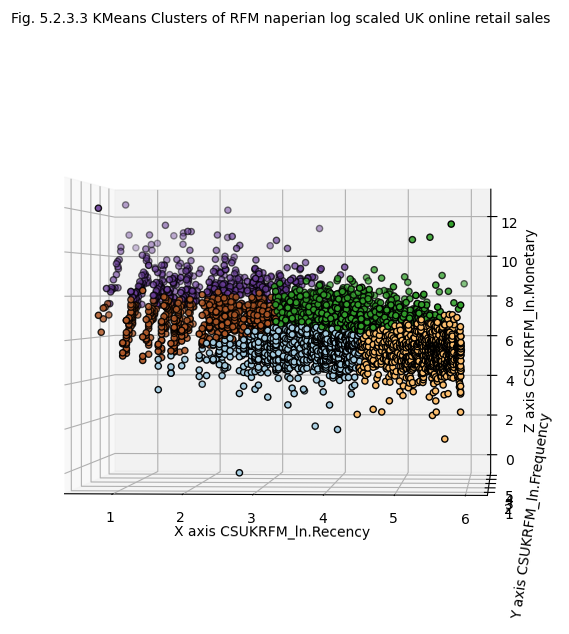

From above 5.2.3.3 graph we notice :
> Purple cluster is about `Recency` values (1 to 3 aprox. or most recent) and `Monetary` values (8-12 aprox.)
>> This could correspond to the **Diamond** LoyaltyGroup of section 5.1.

> Green cluster is about `Recency` values (3 to 6 aprox.) and `Monetary` values (6 to 9 aprox.)
>> This could correspond to the **Platinum** LoyaltyGroup of section 5.1.

> Red cluster is about `Recency` values (1 to 3 aprox.) and `Monetary` values (5 to 8 aprox.)
>> This could correspond to the **Gold** LoyaltyGroup of section 5.1.

> Yellow ocher color cluster is about `Recency` values (4 to 6 aprox.) and `Monetary` values (1 to 7 aprox.)
>> This could correspond to the **Silver** LoyaltyGroup of section 5.1.

> Blue cluster is about `Recency` values (0.5 to 6 aprox.) and `Monetary` values (1 to 6 aprox.)
>> This could correspond to the **Bronze** LoyaltyGroup of section 5.1.

Next, we can observe the differences if do Standardization to the df_rfm_log

[Return to Content of Customer Segmentation by K-Means](#1)

#### 5.2.4 Standardization with StandardScaler() to RFM rescaled ln values (CSUKRFM_ln)
<a id='5.2.4'></a>

In [51]:
#CSUKRFM_ln = pd.read_excel("CSUKRFM_ln.xlsx",index_col=0)

Now, we **standardize features** by applying StandardScaler()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fit and then tranform the data
CSUKRFM_ln_std = scaler.fit_transform(CSUKRFM_ln) 

#convert output to dataframe
CSUKRFM_ln_std = pd.DataFrame(data=CSUKRFM_ln_std,
                             index=CSUKRFM_ln.index,
                             columns=CSUKRFM_ln.columns) 
CSUKRFM_ln_std.describe()

Recency     Frequency      Monetary
count  3.921000e+03  3.921000e+03  3.921000e+03
mean   4.591668e-16  1.177895e-16  1.028053e-15
std    1.000128e+00  1.000128e+00  1.000128e+00
min   -2.420559e+00 -9.572826e-01 -5.245119e+00
25%   -6.968250e-01 -9.572826e-01 -6.710179e-01
50%    7.404942e-02 -3.629526e-01 -5.064466e-02
75%    8.539318e-01  6.530611e-01  6.561656e-01
max    1.586759e+00  5.871447e+00  4.746723e+00

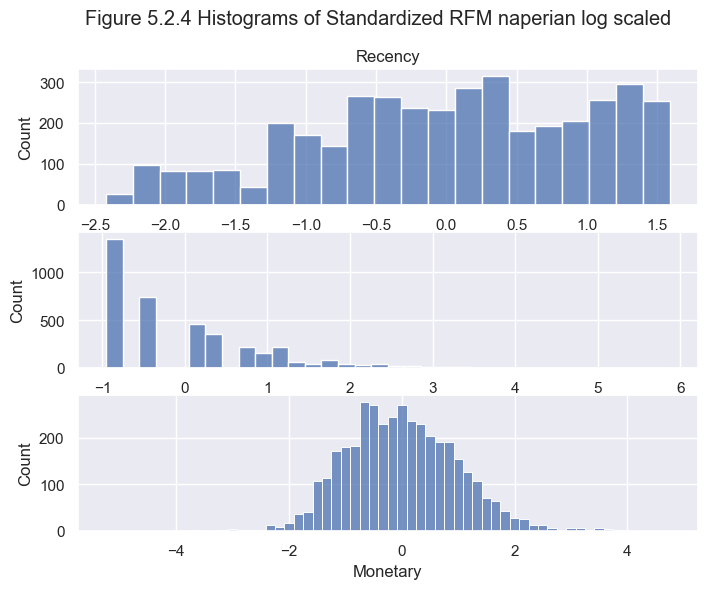

In [56]:
%matplotlib inline
import seaborn as sns; sns.set()
fig, axs = plt.subplots(3, figsize=(8,6))
fig.suptitle("Figure 5.2.4 Histograms of Standardized RFM naperian log scaled")
sns.histplot(CSUKRFM_ln_std['Recency'], ax=axs[0])
axs[0].set_title("Recency")
sns.histplot(CSUKRFM_ln_std['Frequency'], ax=axs[1])
sns.histplot(CSUKRFM_ln_std['Monetary'], ax=axs[2]);
plt.show()

All the data have been standardized now. Nevertheles Recency and Frequency still a little bit skewed.

However, we just stop here for this example.

[Return to Content of Customer Segmentation by K-Means](#1)

### 5.2.5 Applying and visualizing K-Means clusters to Standardized RFM rescaled ln values (CSUKRFM_ln_std
<a id='5.2.5'></a>

In [57]:
# The following 3d interactive plot will be displayed in another tab window
# and it can be manipulated with the mouse
# magic command matplotlib notebook needs to be 
# int the first line of the cell and  
# necessary in conjunction with WebAgg backend
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
#Select the backend used for rendering and GUI integration.
# WebAgg works ok
mpl.use('WebAgg')

fig = plt.figure(figsize=(8, 9))
ax = fig.add_subplot(111, projection='3d')

xs = CSUKRFM_ln_std.Recency
ys = CSUKRFM_ln_std.Frequency
zs = CSUKRFM_ln_std.Monetary

ax.scatter(xs, ys, zs, c=cluster_label, 
           edgecolor='k', cmap='Paired')

ax.set_xlabel('X axis CSUKRFM_ln_std.Recency')
ax.set_ylabel('Y axis CSUKRFM_ln_std.Frequency')
ax.set_zlabel('Z axis CSUKRFM_ln_std.Monetary')
ax.set_title('Fig. 5.2.5 KMeans Clusters of Standardized RFM naperian \
log scaled UK online retail sales', fontsize=10)
plt.show()

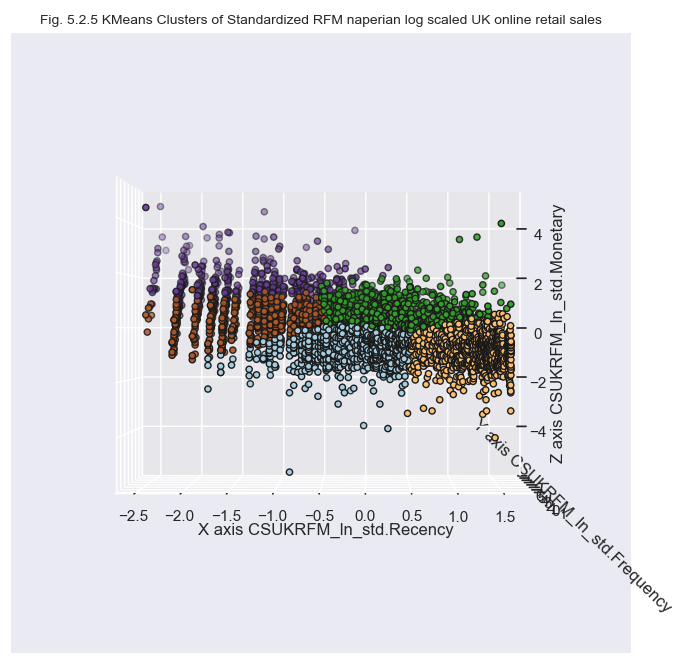

As mentiones before en section [*5.2.2 log transformation as sort of Normalization (rescaling to ln values)*](#5.2.2) <span style='background:turquoise'> The naperian log transformation of RFM could be enough for normalization of feature scaling.</span> Nevertheles Liu, K.(2022) also performed **Standardization with StandardScaler()**, maybe with a first intention to reduce the skewness of `Recency` and `Frequency`. 

**Fortunately,** <span style='background:gold'> this Standardization with StandardScaler() have the additional benefit of better interpretability of `Recency` as the new scale of negative numbers indeed refer to less recent time from last purchase while positive numbers are for more recent time.</span>

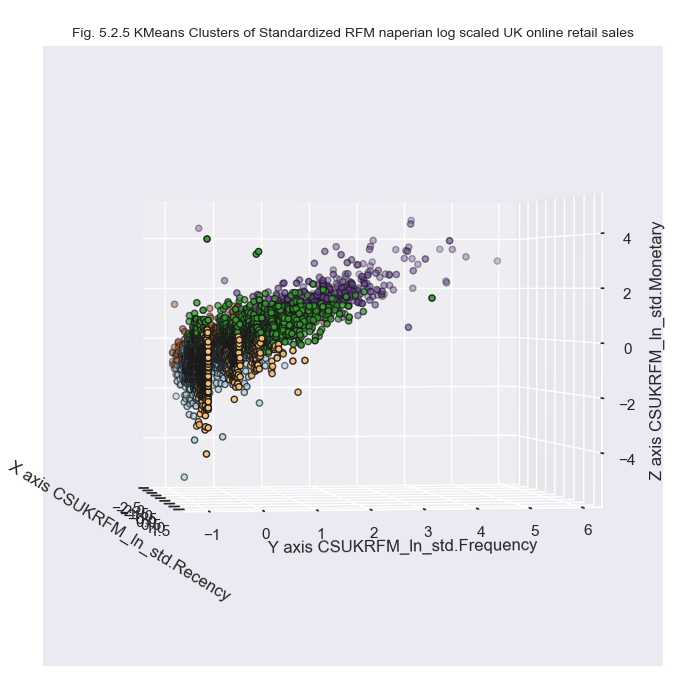

On the other hand, `Monetary's` interpretation could be a bit misleading, as negative numbers could be considered losses while really are not such thing. So this is a sort of tradeoff. 

[Return to Content of Customer Segmentation by K-Means](#1)

#### 5.3 Determining the right number of clusters
<a id='5.3'></a>

First, let's see how we can use the Elbow method to select the right number of clusters                                         

In [97]:
inertia = []  # create an empty list
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(df_rfm_scaled)
    # append the inertia values from each model to the list
    inertia.append(kmeans.inertia_)

**Note**: Inertia is the sum of squared distances of datapoints to their closest cluster centre.

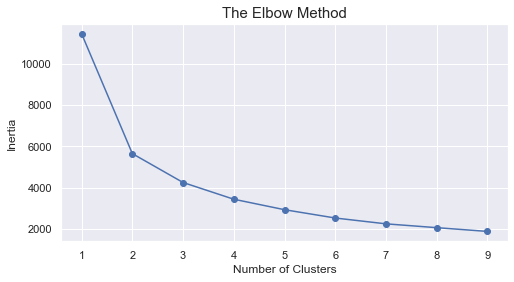

In [98]:
df_inertia = pd.DataFrame({'Cluster': range(1, 10), 
                           'Inertia': inertia})
plt.figure(figsize=(8, 4))
plt.plot(df_inertia.Cluster, df_inertia.Inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize=15);

Looking at the Elbow plot above, it seems that 2 or 3 is where the elbow starts. Let's choose 3 clusters and fit the model. 

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


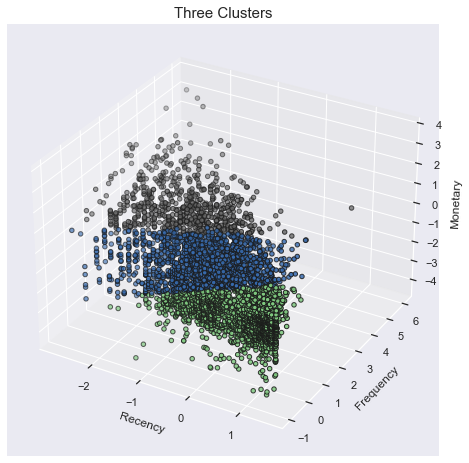

In [99]:
# train kmeans model
kmeans = KMeans(n_clusters=3,random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 3 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, 
           edgecolor='k', cmap='Accent')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Three Clusters', fontsize=15);

<span style='background:beige'>However, note that the elbow method is sometimes ambiguous.</span> An alternative is the average silhouette method (Kaufman and Rousseeuw,1990)

In [82]:
from sklearn.metrics import silhouette_score

**Note**: silhouette coefficients has a range of [-1, 1]. Closer to 1 means better.

In [83]:
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters

for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_rfm_scaled)
    clusters = kmeans.predict(df_rfm_scaled)
    sil_avg = silhouette_score(df_rfm_scaled, clusters)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", sil_avg)

For n_clusters = 2 The average silhouette_score is : 0.4337451049965268
For n_clusters = 3 The average silhouette_score is : 0.340529381288137
For n_clusters = 4 The average silhouette_score is : 0.3333115356295476
For n_clusters = 5 The average silhouette_score is : 0.3112774723320785
For n_clusters = 6 The average silhouette_score is : 0.29398494681694687
For n_clusters = 7 The average silhouette_score is : 0.28686571970475655
For n_clusters = 8 The average silhouette_score is : 0.28672610534596366
For n_clusters = 9 The average silhouette_score is : 0.2880180188571036
For n_clusters = 10 The average silhouette_score is : 0.2941041384796828
For n_clusters = 11 The average silhouette_score is : 0.2843928088198798
For n_clusters = 12 The average silhouette_score is : 0.2763225685785895
For n_clusters = 13 The average silhouette_score is : 0.2807078366621835
For n_clusters = 14 The average silhouette_score is : 0.28031162230694046
For n_clusters = 15 The average silhouette_score is : 0.

Clearly 2 clusters gives the highest silhouette score

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


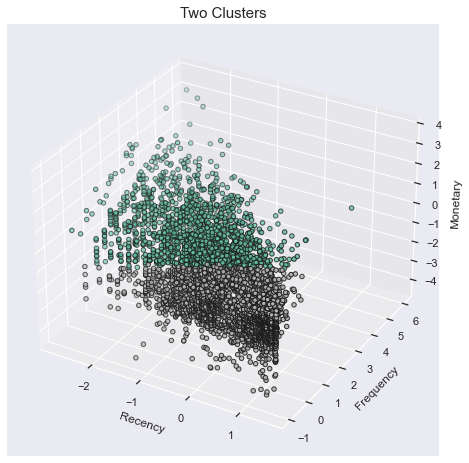

In [84]:
# set n_clsuters to 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 2 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, edgecolor='k', cmap='Set2')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Two Clusters', fontsize=15);

[Return to Content of Customer Segmentation by K-Means](#1)

C:\Users\conza\Anaconda3\envs\TFKERAS\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


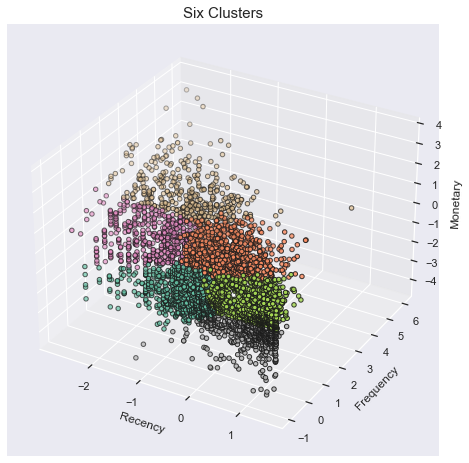

In [85]:
# train kmeans model with 6 clusters
kmeans = KMeans(n_clusters=6,random_state=42)
clusters = kmeans.fit_predict(df_rfm_scaled)
cluster_lable = kmeans.labels_

# 3D scatter plot with 3 clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)

ax.scatter(df_rfm_scaled.Recency, df_rfm_scaled.Frequency,
           df_rfm_scaled.Monetary, c=cluster_lable, 
           edgecolor='k', cmap='Set2')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Six Clusters', fontsize=15);

**Conclusion**: Since the data are not clearly differentiated in the 3D plot, I would argue that either 2 or 6 clusters would be fine, depending on how you want to categorise your customers into different groups.

[Return to Content of Customer Segmentation by K-Means](#1)

## 6 References
<a id='6'></a>

Liu, K. (2022). Supply Chain Analytics: Concepts, Techniques and Applications. Palgrave Macmillan.

McKinney, W. (2018). Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 2nd. Ed. O’Reilly.

Sarkar, D., Bali, R., & Sharma, T. (2018). Practical Machine Learning with Python: A Problem-Solver’s Guide to Building Real-World Intelligent Systems. Apress.

Swamynathan, M. (2019). Mastering Machine Learning with Python in Six Steps. A Practical Implementation Guide to Predictive Data Analytics Using Python (2nd Ed.). Apress.

[Return to Content of Customer Segmentation by K-Means](#1)